# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [503]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [506]:
# 한글 표시를 위한 라이브러리 설치
# !pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [509]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [513]:
# 파일 불러오기
apart = joblib.load('new_data3.pkl')

#### 2) 기본 정보 조회

In [516]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     354 non-null    object 
 1   총세대수     354 non-null    int64  
 2   지역       354 non-null    object 
 3   준공연도     354 non-null    int32  
 4   건물형태     354 non-null    object 
 5   난방방식     354 non-null    object 
 6   승강기설치여부  354 non-null    object 
 7   실차량수     354 non-null    int64  
 8   총면적      354 non-null    float64
 9   10-40    354 non-null    int64  
 10  40-60    354 non-null    int64  
 11  60-80    354 non-null    int64  
 12  80-100   354 non-null    int64  
 13  100-200  354 non-null    int64  
 14  임대보증금    354 non-null    float64
 15  임대료      354 non-null    float64
dtypes: float64(3), int32(1), int64(7), object(5)
memory usage: 43.0+ KB


In [517]:
apart.shape

(354, 16)

In [520]:
apart.describe()

,총세대수,준공연도,실차량수,총면적,10-40,40-60,60-80,80-100,100-200,임대보증금,임대료
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,3.540000e+02,354.000000
mean,544.367232,2007.935028,554.548023,37020.752845,216.672316,277.912429,18.271186,30.802260,2.853107,2.369888e+07,197861.527276
std,430.262323,7.319791,373.030267,29439.709065,294.739833,318.799360,89.698235,104.746506,32.044249,2.226297e+07,157632.882626
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11191.935525,0.000000,0.000000,0.000000,0.000000,0.000000,1.274318e+07,114310.000000
50%,491.000000,2009.000000,502.000000,32178.977000,102.000000,162.500000,0.000000,0.000000,0.000000,1.907475e+07,172840.000000
75%,849.750000,2013.000000,820.000000,56065.287300,344.500000,438.250000,0.000000,0.000000,0.000000,2.822704e+07,227420.500000
max,2289.000000,2022.000000,1657.000000,150126.863200,1630.000000,1445.000000,1002.000000,715.000000,433.000000,1.898219e+08,950305.000000


In [521]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-40,40-60,60-80,80-100,100-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,150,216,111,0,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,5.522750e+07,340148.333333


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [525]:
apart.isna().sum()

단지코드       0
총세대수       0
지역         0
준공연도       0
건물형태       0
난방방식       0
승강기설치여부    0
실차량수       0
총면적        0
10-40      0
40-60      0
60-80      0
80-100     0
100-200    0
임대보증금      0
임대료        0
dtype: int64

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [529]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수 분석 함수 정의
def continuous_variable(data, variable):
    
    plt.rcParams["figure.figsize"]=(10,3) #모든 그래프를 해당 크기로 고정
    
    # 기술 통계 출력
    print(f"--- {variable} 기술통계 ---")
    print(data[variable].describe())
    print("\n")
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], kde=True)
    plt.title(f'{variable} 분포')
    plt.xlabel(variable)
    plt.ylabel('빈도수')
    
    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[variable])
    plt.title(f'{variable} 박스플롯')
    
    plt.tight_layout()
    plt.show()


## 실차량수

--- 실차량수 기술통계 ---
count     354.000000
mean      554.548023
std       373.030267
min        21.000000
25%       258.000000
50%       502.000000
75%       820.000000
max      1657.000000
Name: 실차량수, dtype: float64




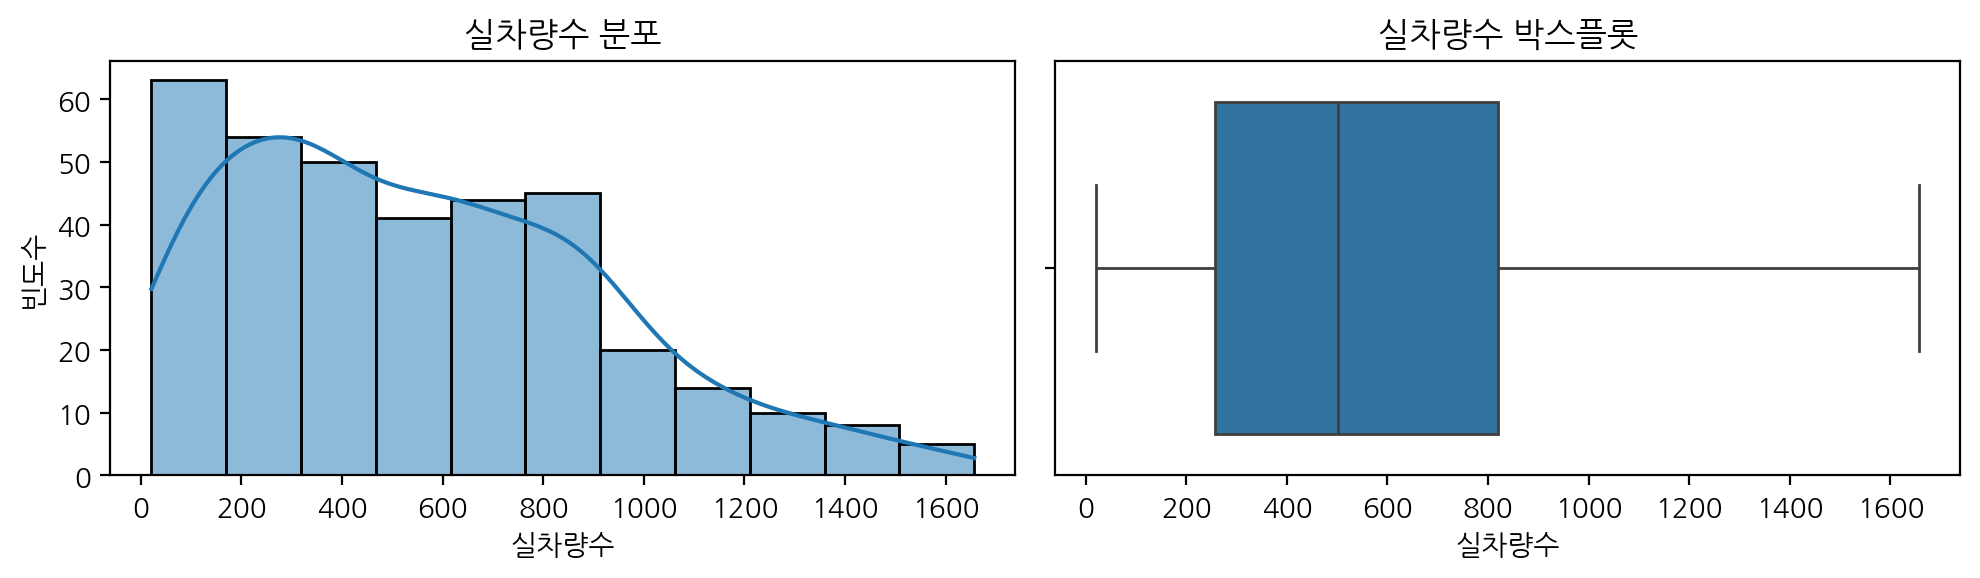

In [532]:
# 각 연속형 변수를 하나씩 정의하고 분석 수행
var1 = '실차량수'
continuous_variable(apart, var1)

## 총세대수

--- 총세대수 기술통계 ---
count     354.000000
mean      544.367232
std       430.262323
min         1.000000
25%       178.000000
50%       491.000000
75%       849.750000
max      2289.000000
Name: 총세대수, dtype: float64




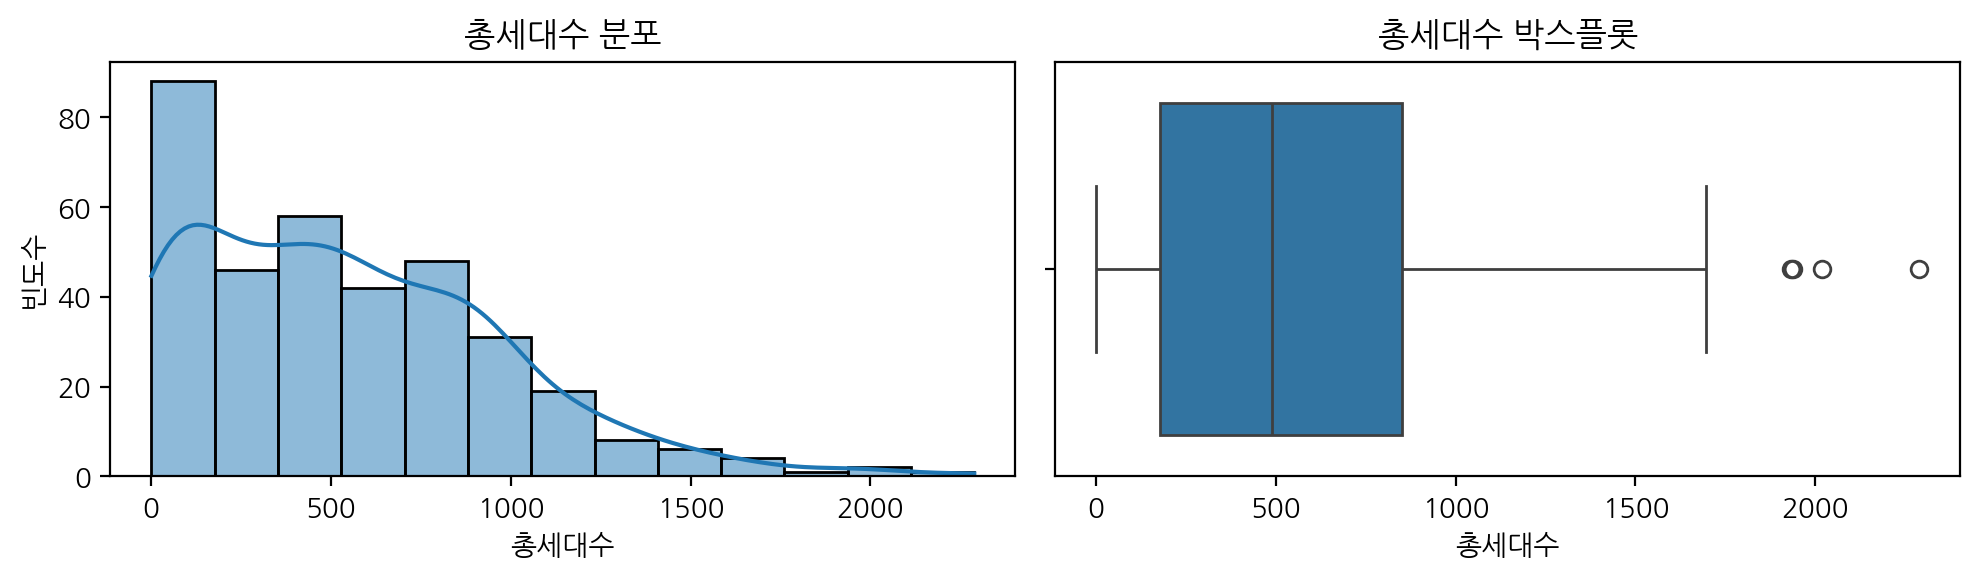

In [534]:
var2 = '총세대수'
continuous_variable(apart, var2)

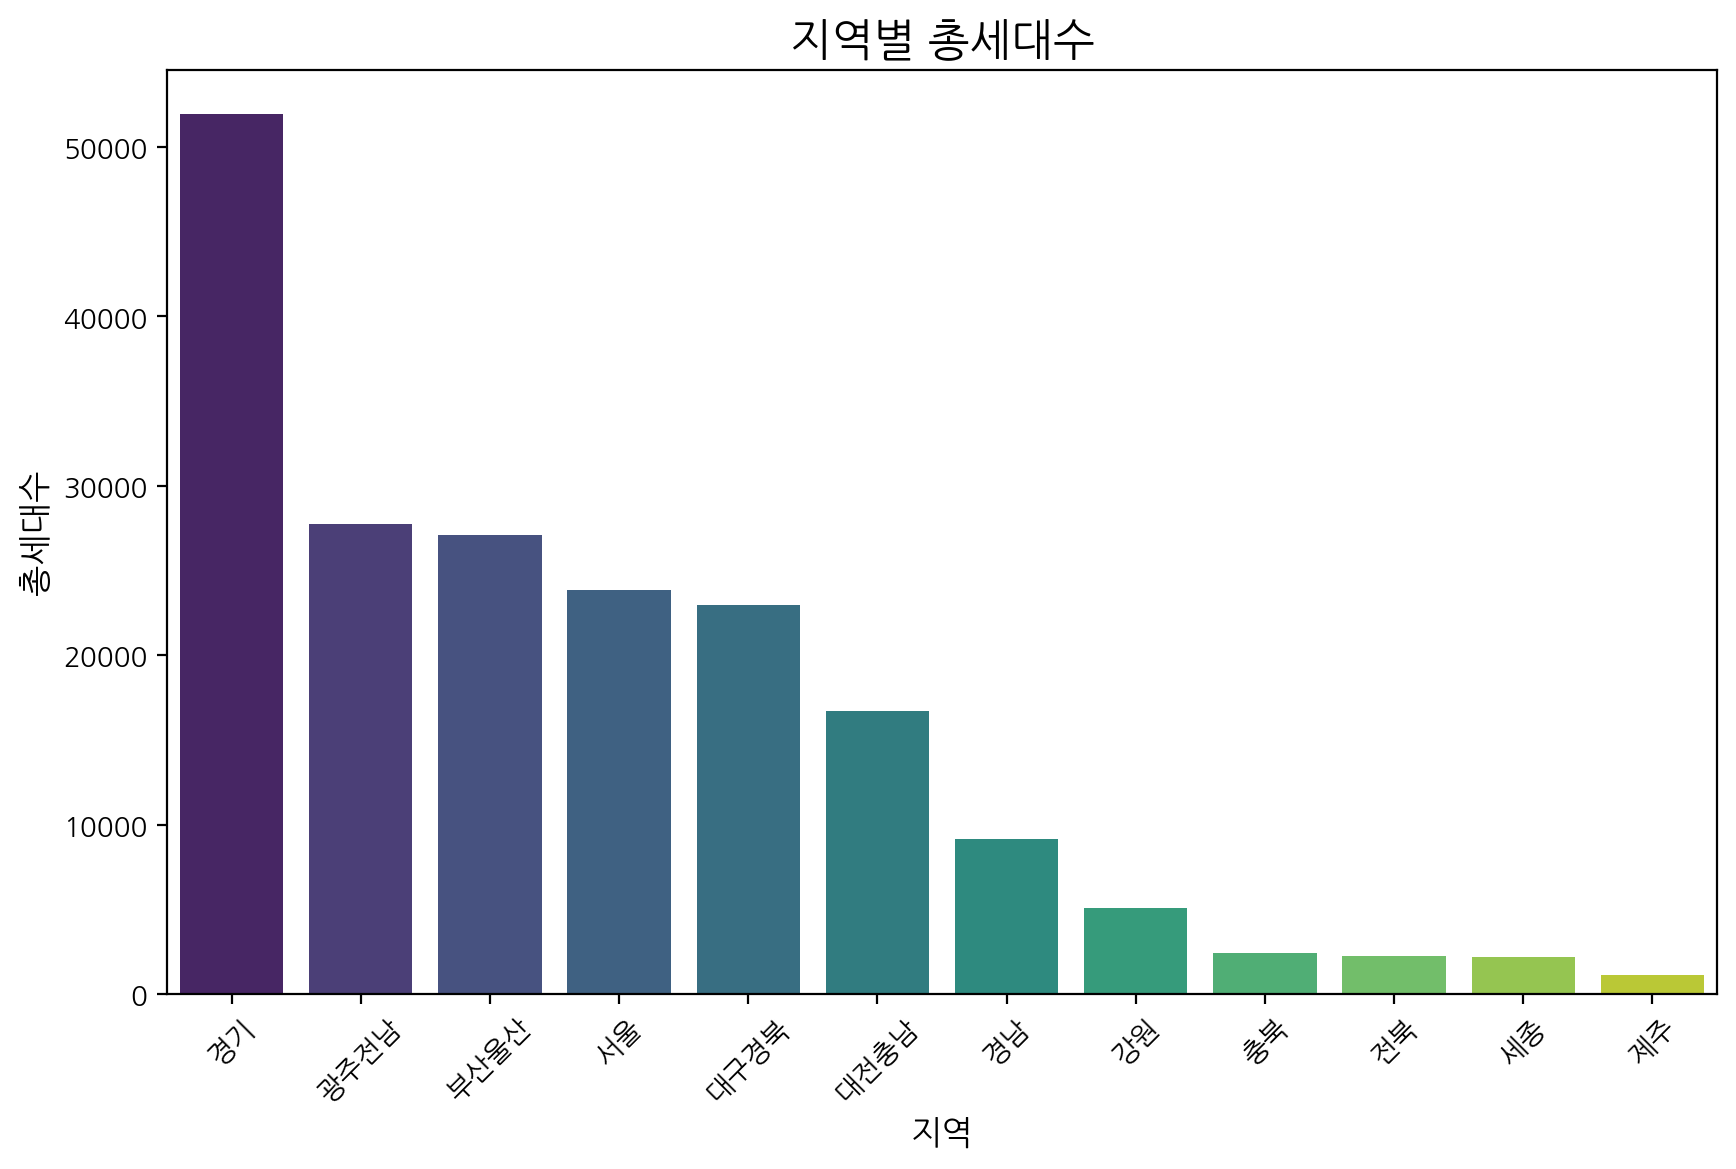

In [537]:
# 지역별 총세대수의 합계를 구한 후 내림차순 정렬
result = apart.groupby('지역')['총세대수'].sum().sort_values(ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
sns.barplot(x=result.index, y=result.values, palette='viridis')

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 총세대수', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('총세대수', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

## 총면적

--- 총면적 기술통계 ---
count       354.000000
mean      37020.752845
std       29439.709065
min          68.930000
25%       11191.935525
50%       32178.977000
75%       56065.287300
max      150126.863200
Name: 총면적, dtype: float64




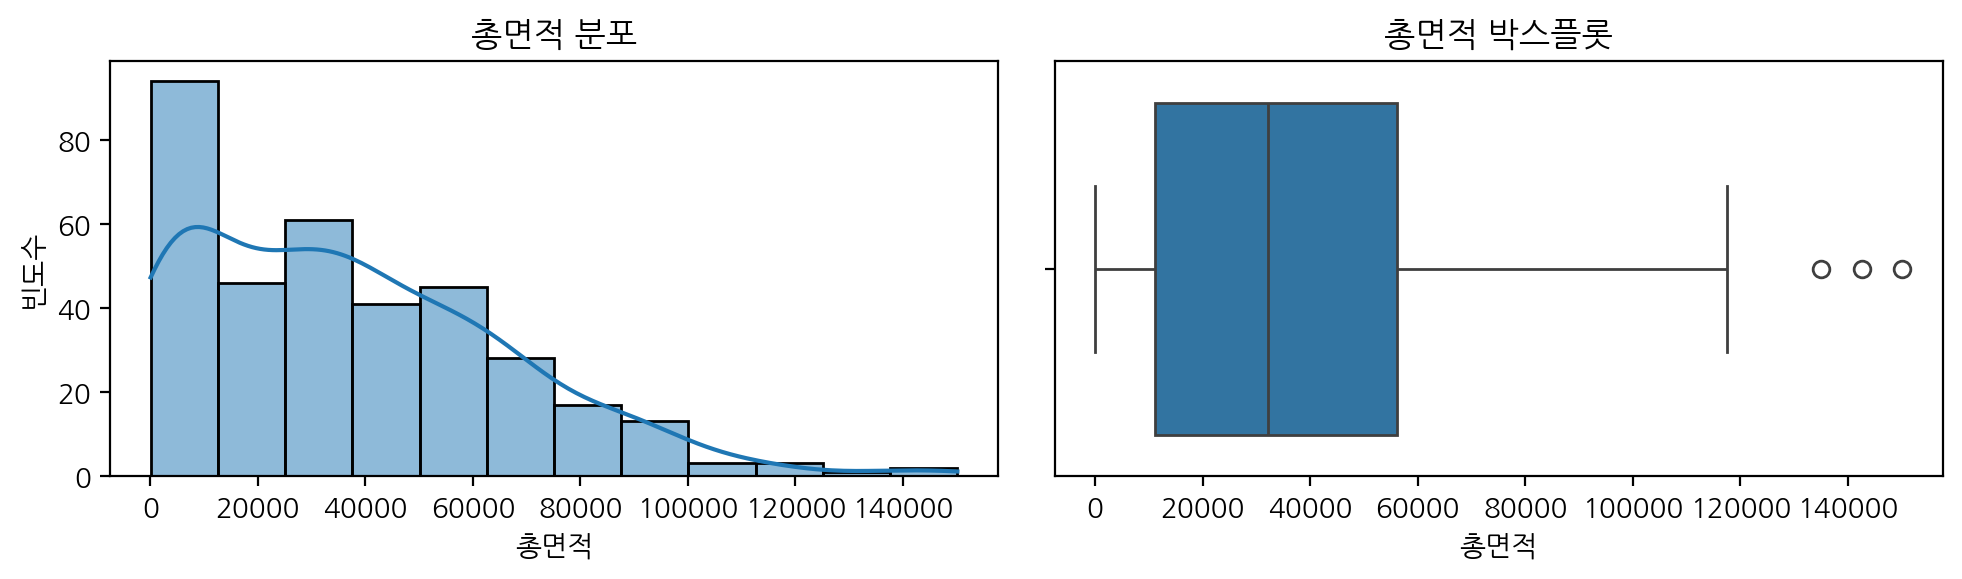

In [540]:
var3 = '총면적'
continuous_variable(apart, var3)

## 준공연도

--- 준공연도 기술통계 ---
count     354.000000
mean     2007.935028
std         7.319791
min      1992.000000
25%      2003.000000
50%      2009.000000
75%      2013.000000
max      2022.000000
Name: 준공연도, dtype: float64




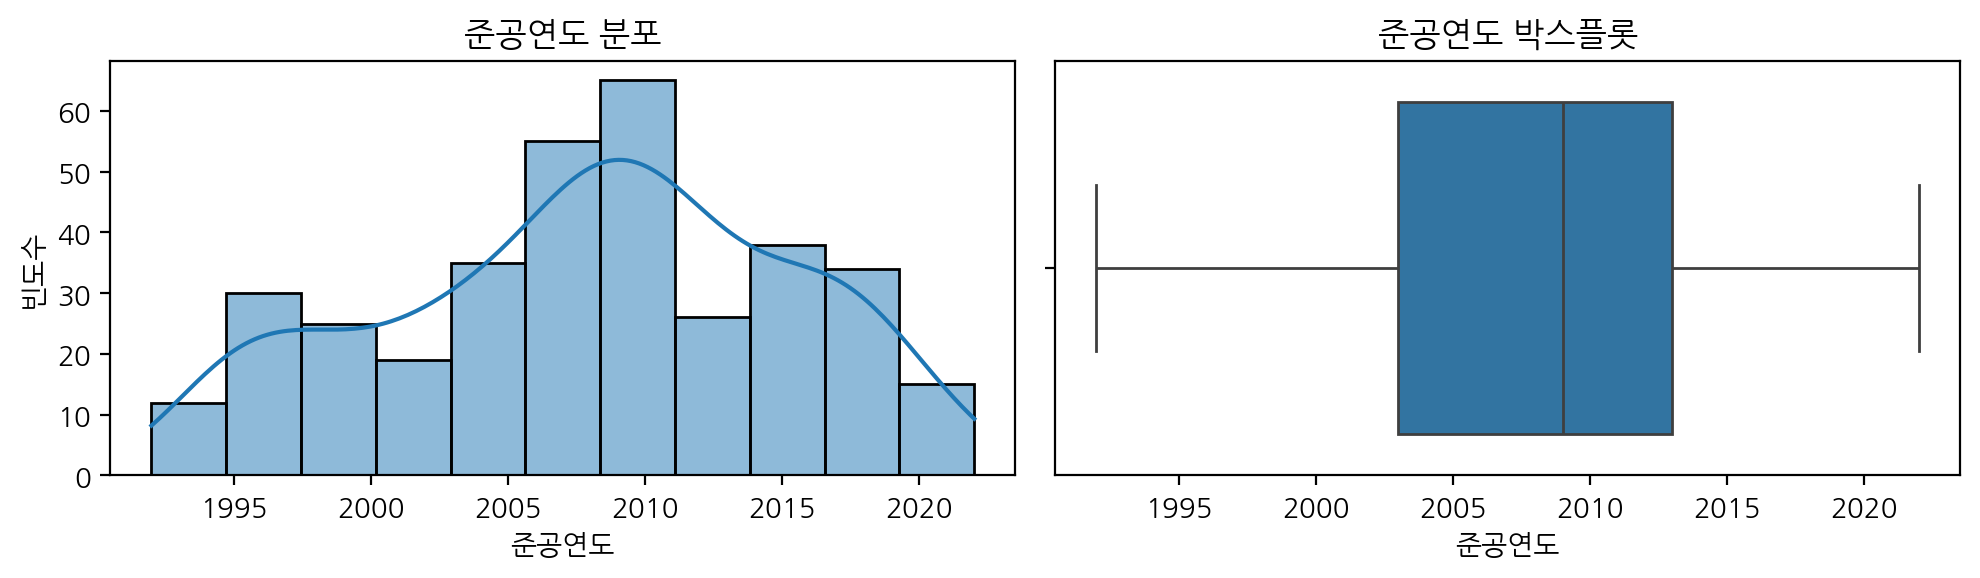

In [543]:
var4 = '준공연도'
continuous_variable(apart, var4)

## 임대료

--- 임대료 기술통계 ---
count       354.000000
mean     197861.527276
std      157632.882626
min           0.000000
25%      114310.000000
50%      172840.000000
75%      227420.500000
max      950305.000000
Name: 임대료, dtype: float64




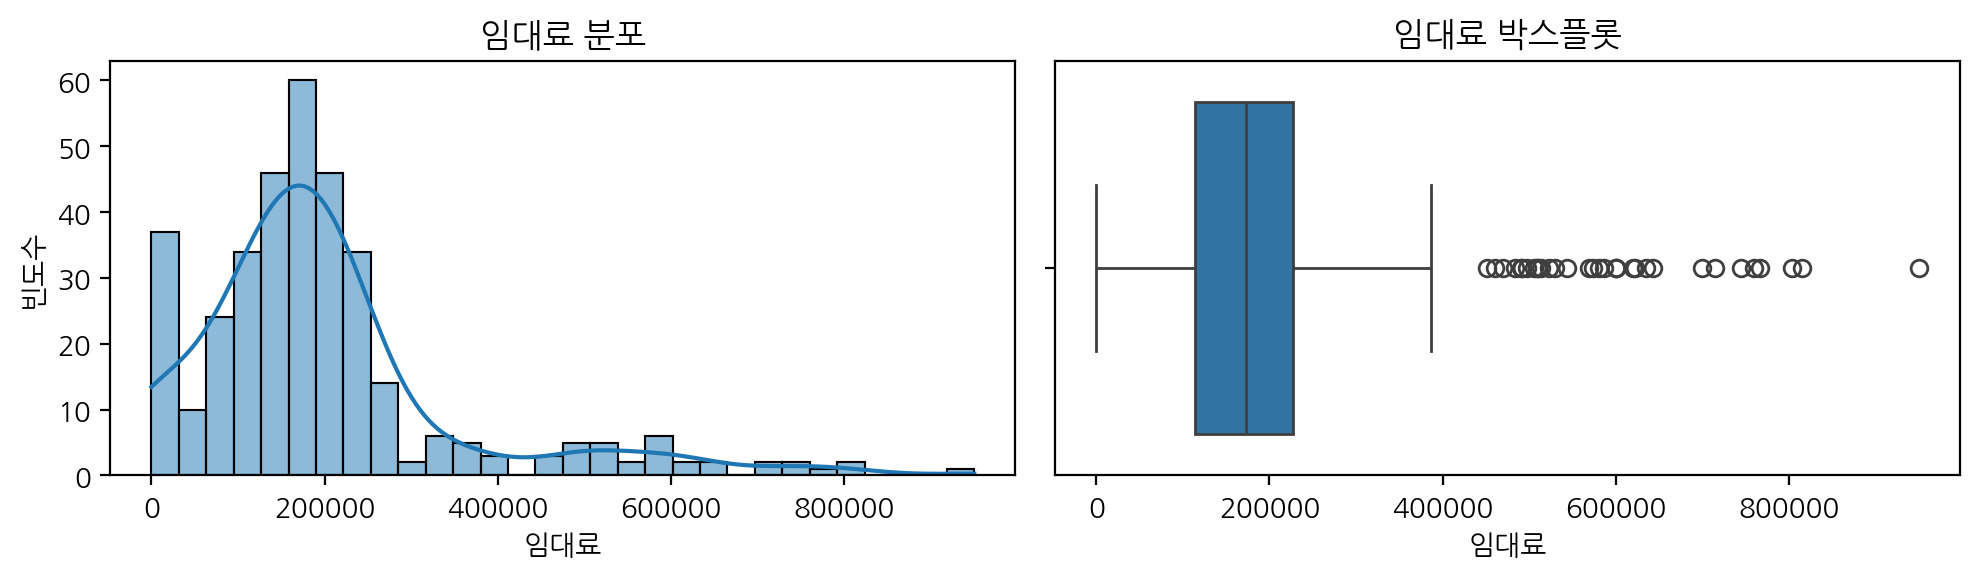

In [546]:
var5 = '임대료'
continuous_variable(apart, var5)

## 임대보증금

--- 임대보증금 기술통계 ---
count    3.540000e+02
mean     2.369888e+07
std      2.226297e+07
min      0.000000e+00
25%      1.274318e+07
50%      1.907475e+07
75%      2.822704e+07
max      1.898219e+08
Name: 임대보증금, dtype: float64




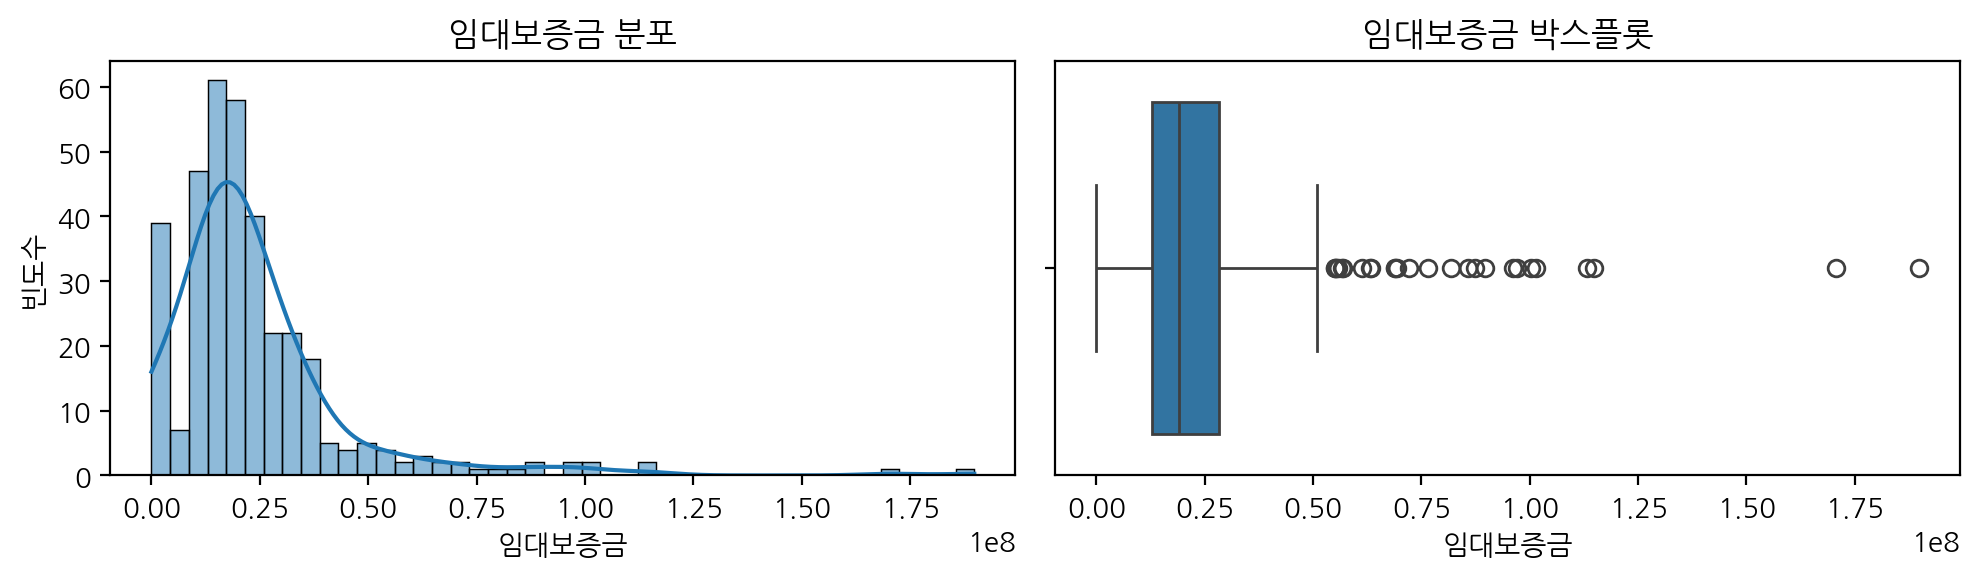

In [549]:
var6 = '임대보증금'
continuous_variable(apart, var6)

### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [552]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_variable(data, var):
        plt.rcParams["figure.figsize"]=(10,3) #모든 그래프를 해당 크기로 고정
    
        sns.countplot(data=data, x=var, order=data[var].value_counts().index)
        plt.title(f'{var} 빈도수')
        plt.xticks(rotation=45)
        plt.xlabel(var)
        plt.ylabel('빈도수')
        plt.tight_layout()
        plt.show()


#### 1) 지역

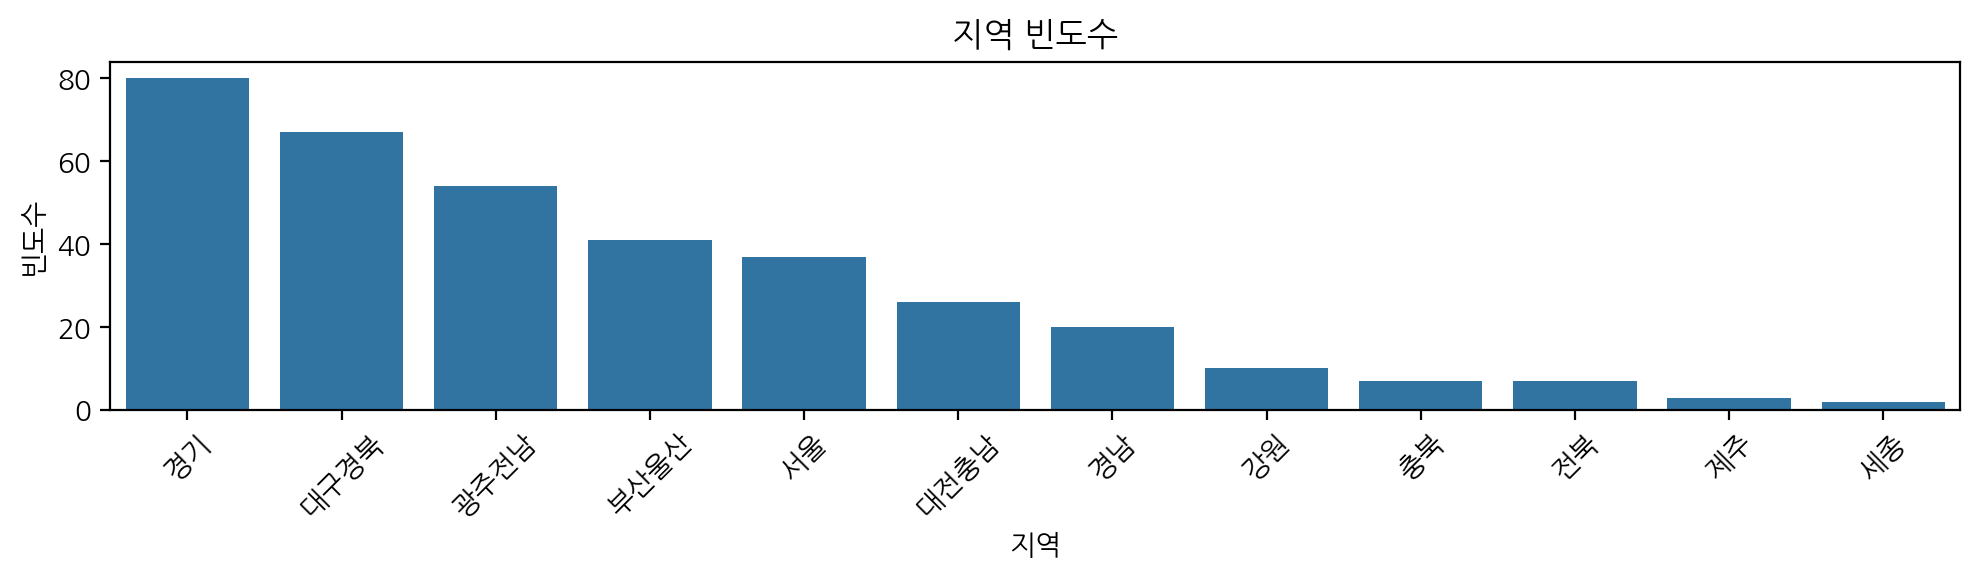

In [555]:
var1 = '지역'
categorical_variable(apart,var1)

#### 2) 건물형태

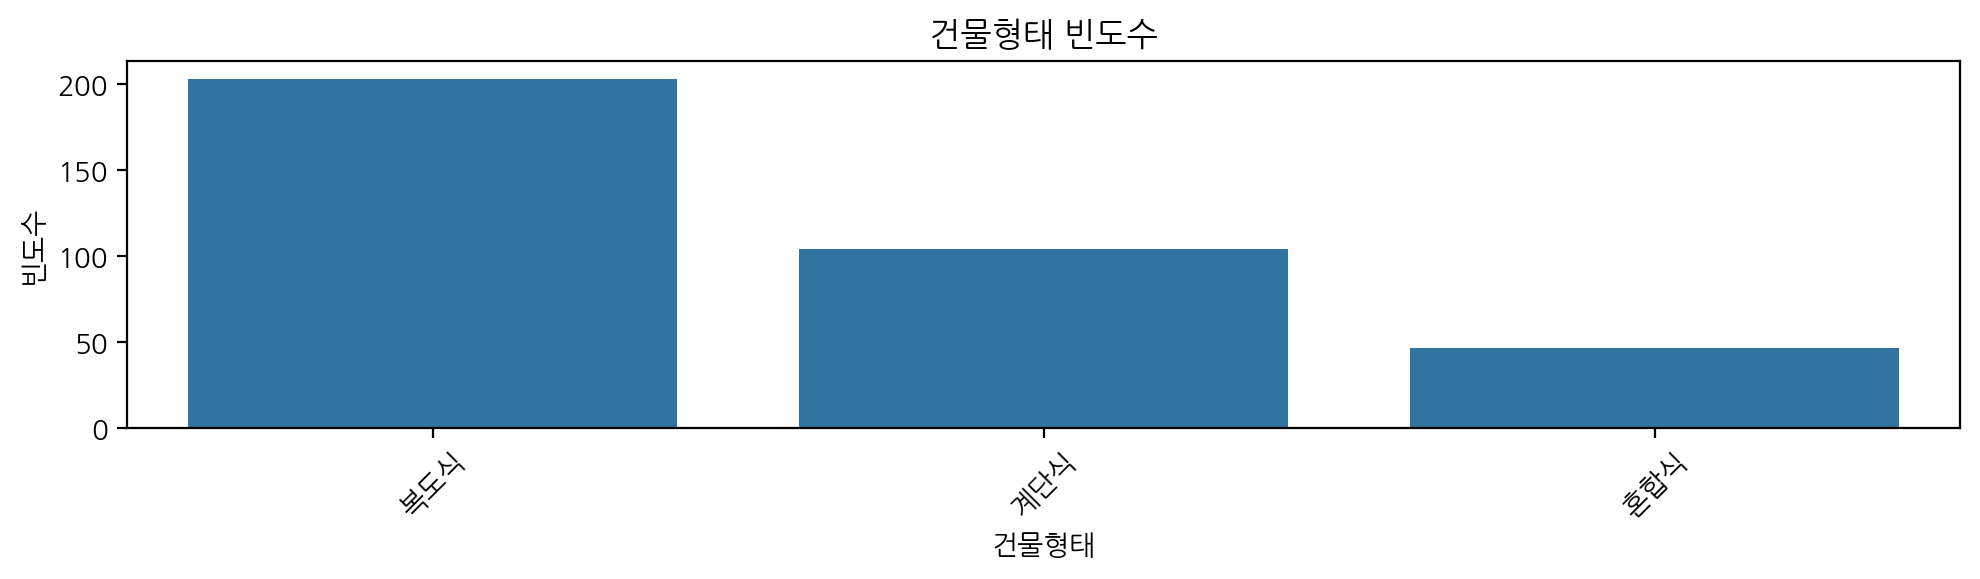

In [558]:
var1 = '건물형태'
categorical_variable(apart,var1)

#### 3) 난방방식

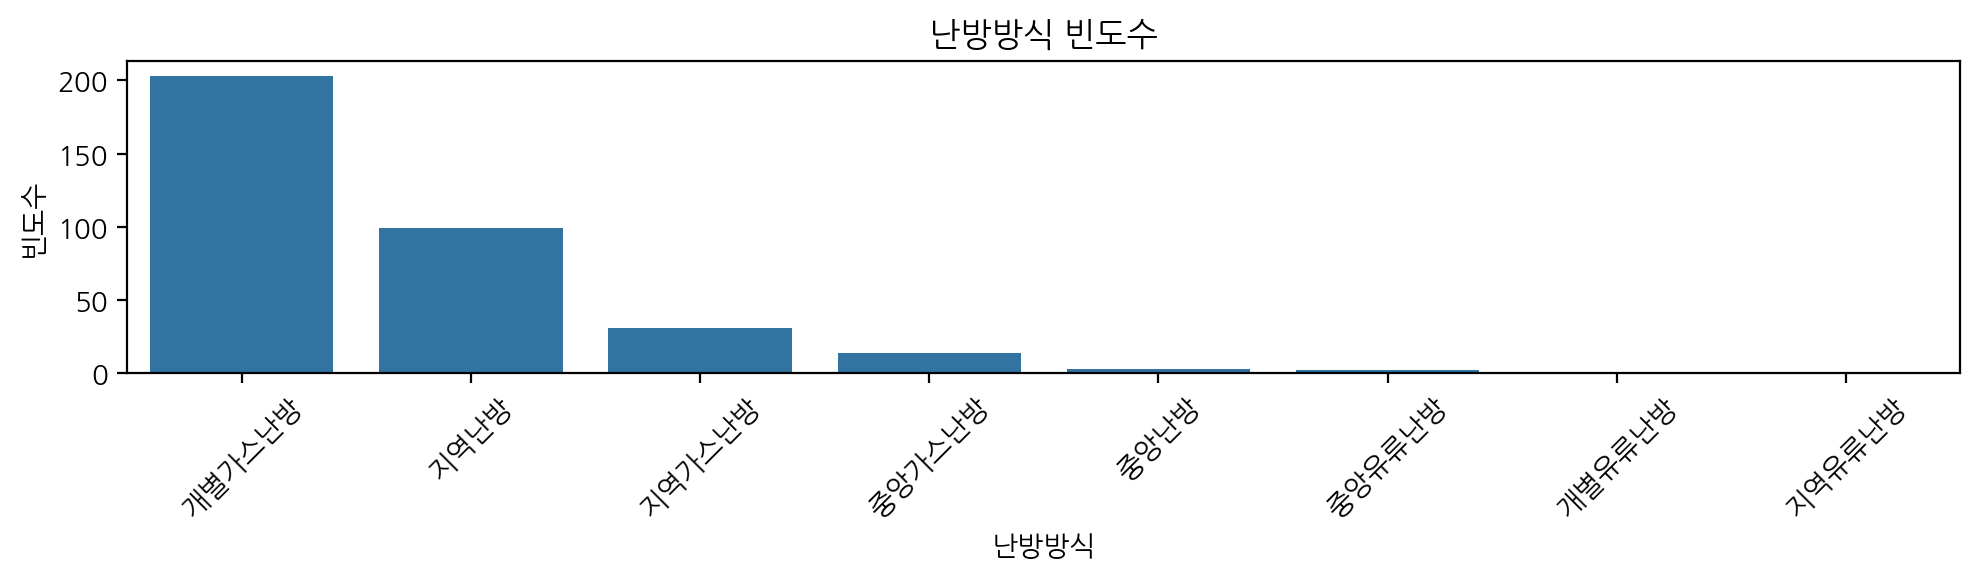

In [561]:
var1 = '난방방식'
categorical_variable(apart,var1)

#### 4) 승강기설치여부

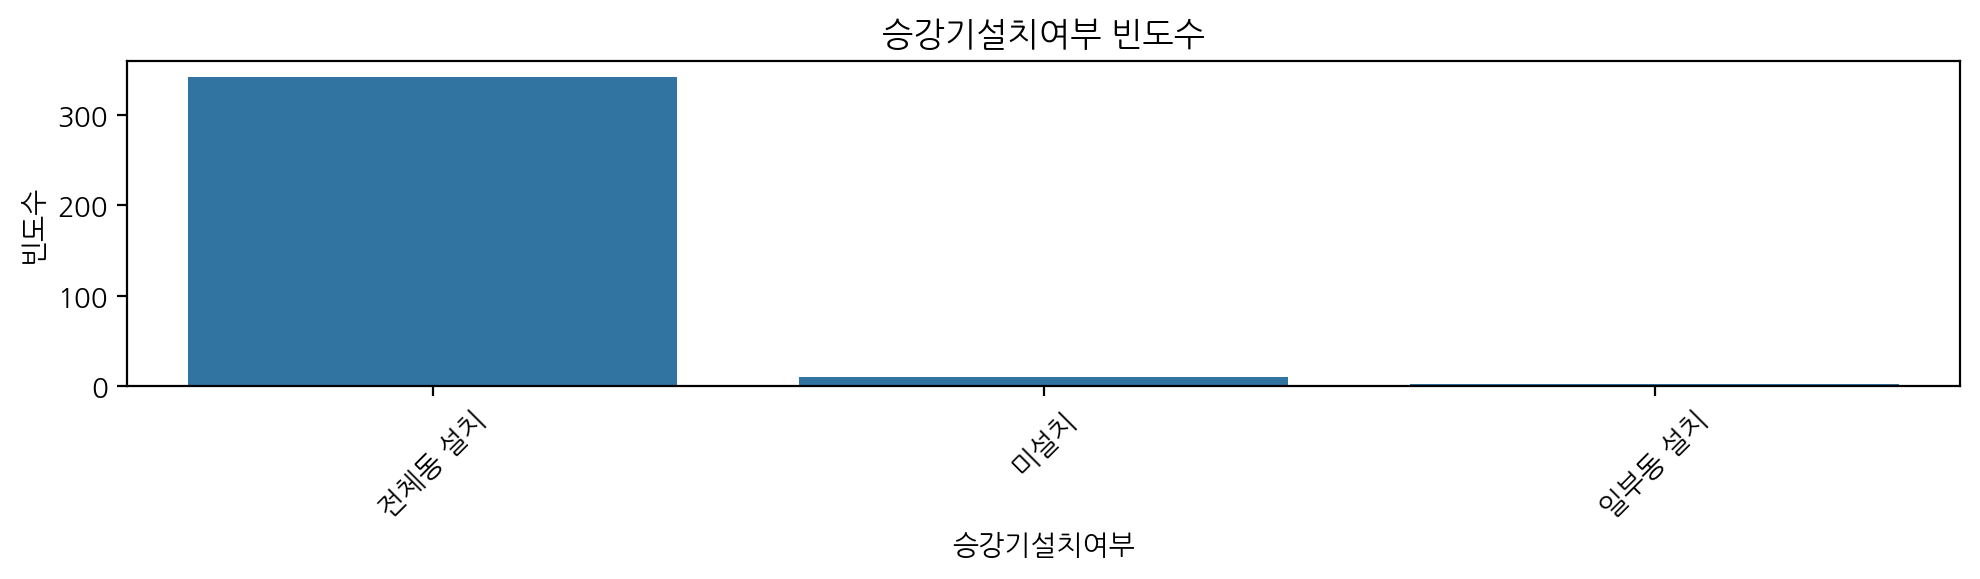

In [564]:
var1 = '승강기설치여부'
categorical_variable(apart,var1)

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

# pd.melt()로 피벗 해제
melted_data = pd.melt(apart, id_vars=['단지코드'], 
                       value_vars=['10-30', '30-40','40-50', '50-60', '60-70', '70-80', '80-200'],
                       var_name='전용면적구간', 
                       value_name='세대수')

# 결과 확인
melted_data.head(300)

In [570]:
# pd.melt()로 피벗 해제
melted_data = pd.melt(apart, id_vars=['단지코드'], 
                       value_vars=['10-40', '40-60','60-80', '80-100', '100-200'],
                       var_name='전용면적구간', 
                       value_name='세대수')

# 결과 확인
melted_data.head(300)

,단지코드,전용면적구간,세대수
0,C0001,10-40,0
1,C0002,10-40,35
2,C0003,10-40,0
3,C0004,10-40,0
4,C0006,10-40,15
...,...,...,...
295,C0308,10-40,450
296,C1309,10-40,20
297,C0310,10-40,74
298,C1310,10-40,18


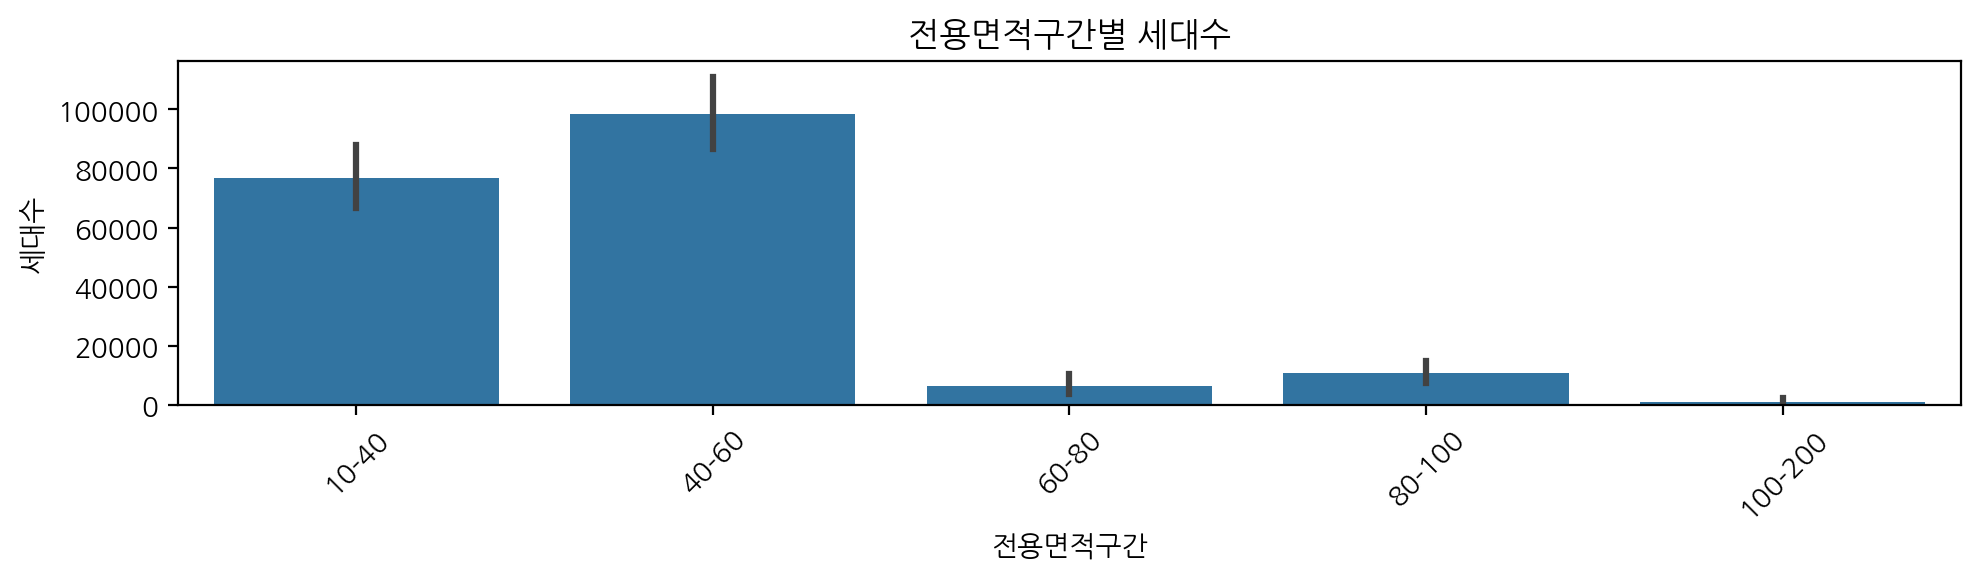

In [572]:
sns.barplot(data=melted_data, x='전용면적구간', y='세대수', estimator=sum)
plt.title('전용면적구간별 세대수')
plt.xlabel('전용면적구간')
plt.ylabel('세대수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

In [575]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-40,40-60,60-80,80-100,100-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,150,216,111,0,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,5.522750e+07,340148.333333


### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

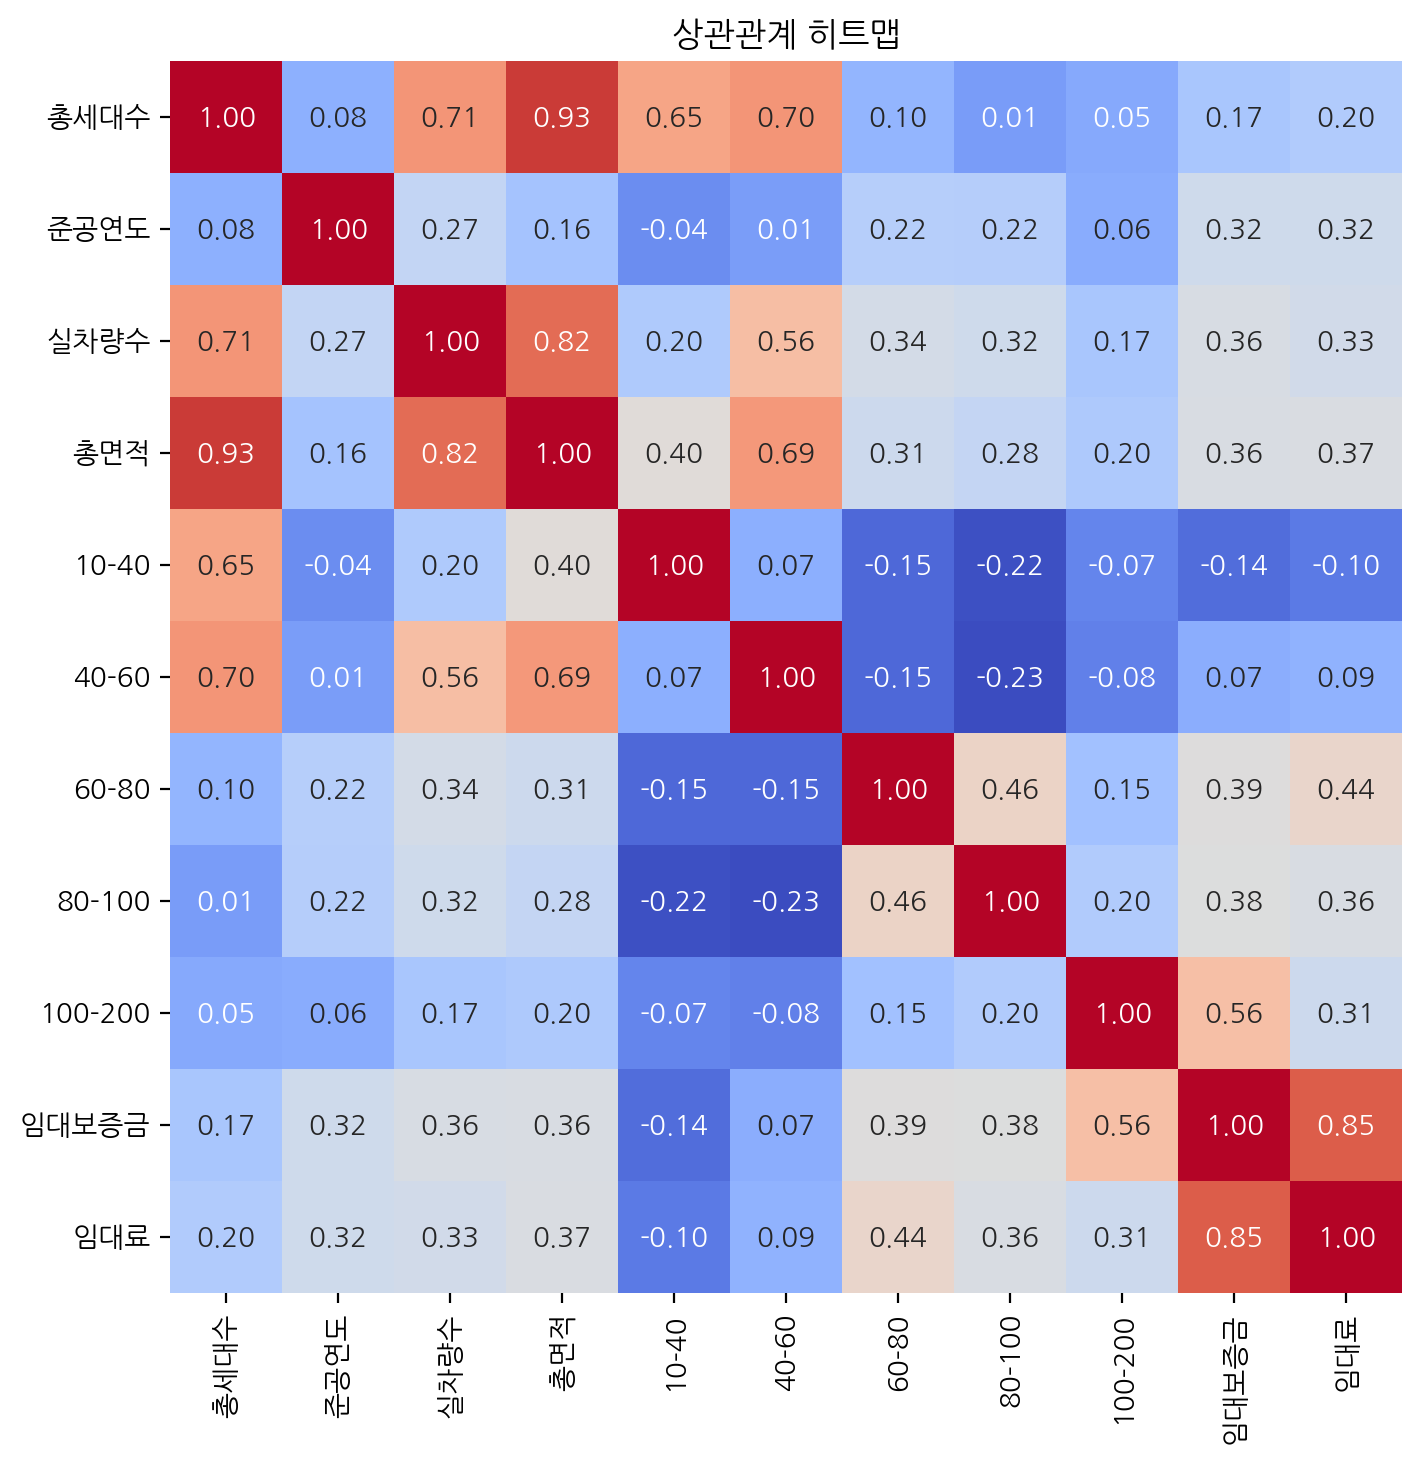

실차량수와 다른 변수 간의 상관관계:
실차량수       1.000000
총면적        0.815317
총세대수       0.705802
40-60      0.564634
임대보증금      0.356453
60-80      0.337587
임대료        0.328353
80-100     0.319951
준공연도       0.271244
10-40      0.197138
100-200    0.173102
Name: 실차량수, dtype: float64


In [578]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수 리스트
numerical_vars = apart.select_dtypes(include=['number']).columns.tolist()

# 숫자형 변수들로 구성된 데이터프레임 생성
numerical_data = apart[numerical_vars]

# 상관계수 행렬 계산
correlation_matrix = numerical_data.corr()

# '실차량수'와 다른 변수 간의 상관관계 확인
correlation_with_target = correlation_matrix['실차량수'].sort_values(ascending=False)

# 상관계수 행렬 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, 
            annot=True, fmt=".2f", 
            cbar=False,
            cmap='coolwarm', 
            square=True)
plt.title('상관관계 히트맵')
plt.show()

# '실차량수'와의 상관관계 출력
print("실차량수와 다른 변수 간의 상관관계:")
print(correlation_with_target)


### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [580]:
def correlation_scatter(data, target_var, variable):
    
    sns.scatterplot(data=data, x=target_var, y=variable, alpha=0.6)  # x에 실차량수, y에 변수
    plt.title(f'{target_var} vs {variable}')  # 제목 변경
    plt.xlabel(target_var)  # x축 레이블
    plt.ylabel(variable)     # y축 레이블을 변수명으로 설정
    plt.axvline(x=data[target_var].mean(), color='r', linestyle='--', label=f'{target_var} 평균')  # 평균선 추가
    plt.legend()
    plt.tight_layout()
    plt.show()

In [583]:
# 상관계수가 높은 변수 리스트
high_corr_vars = ['총면적', '총세대수', '40-60', '임대보증금', '60-80']

#### 1) 총면적

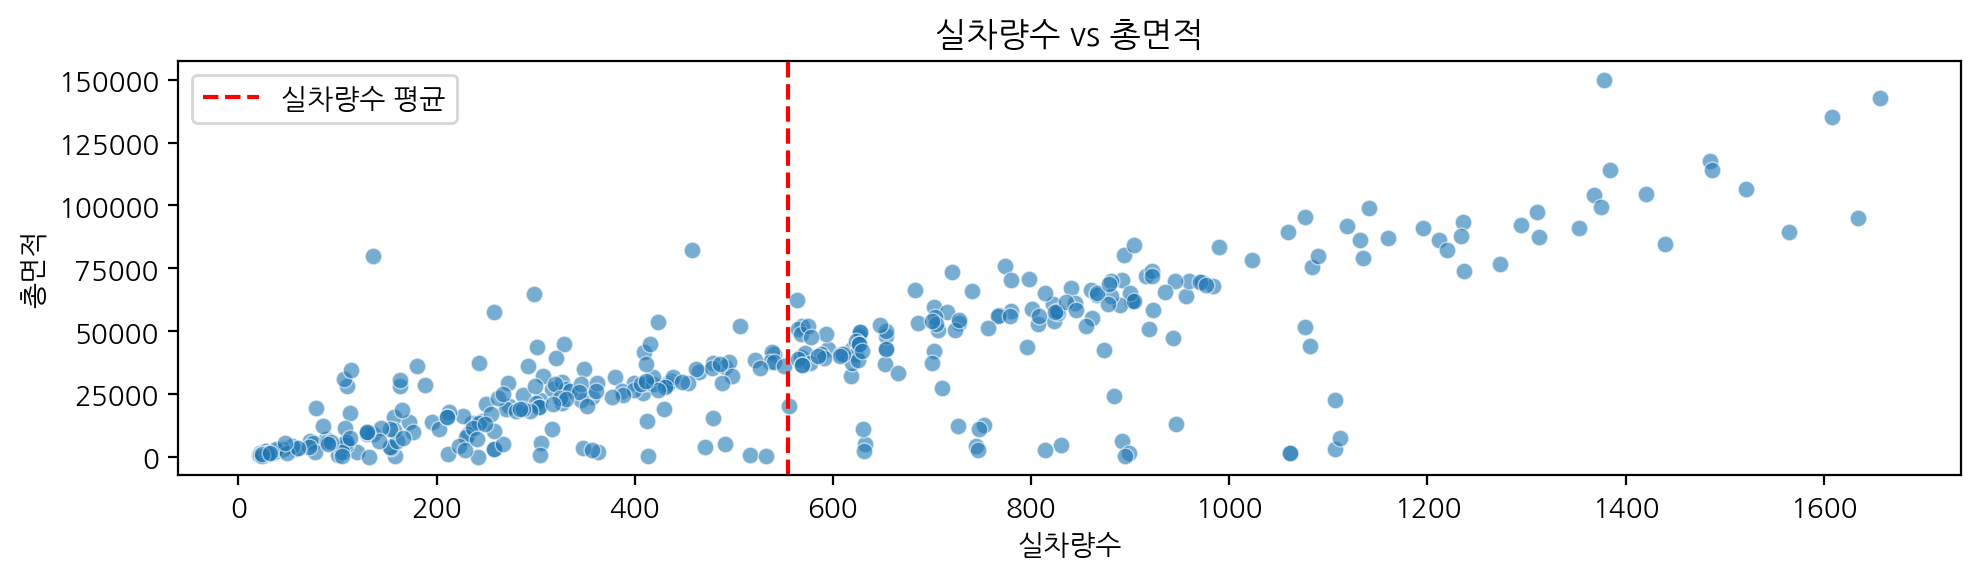

In [586]:
high_corr_vars = '총면적'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 2) 총세대수

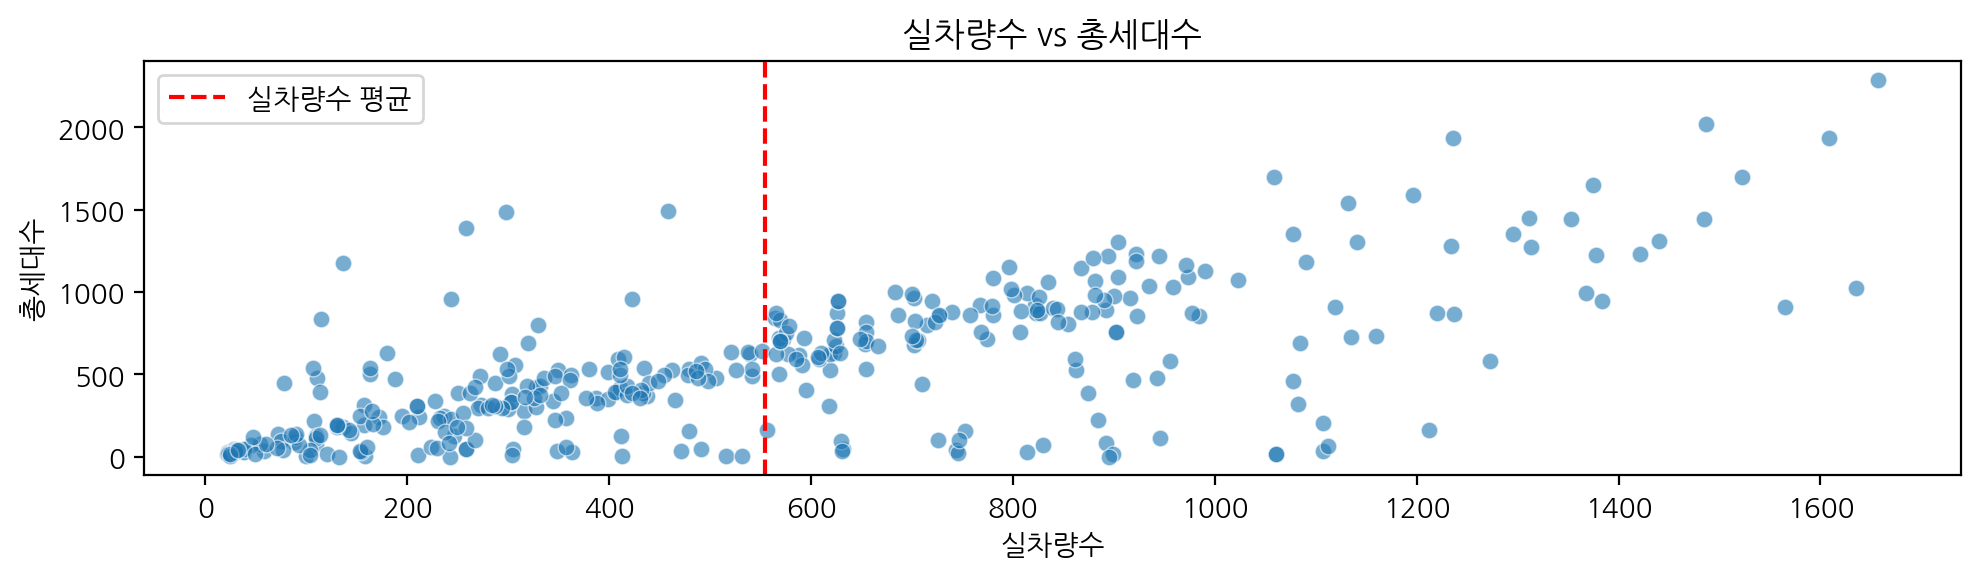

In [589]:
high_corr_vars = '총세대수'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 3) 40-60

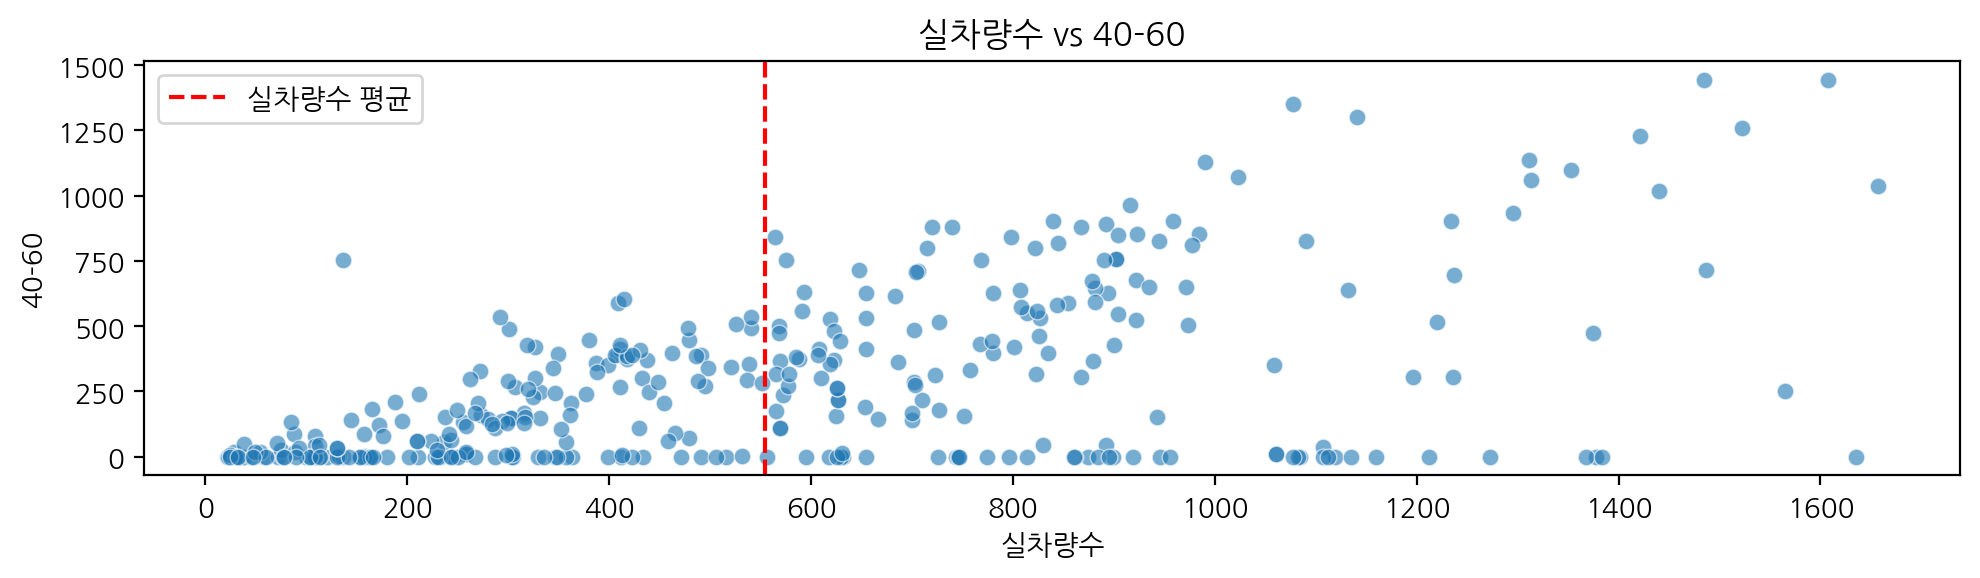

In [592]:
high_corr_vars = '40-60'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 4) 임대보증금

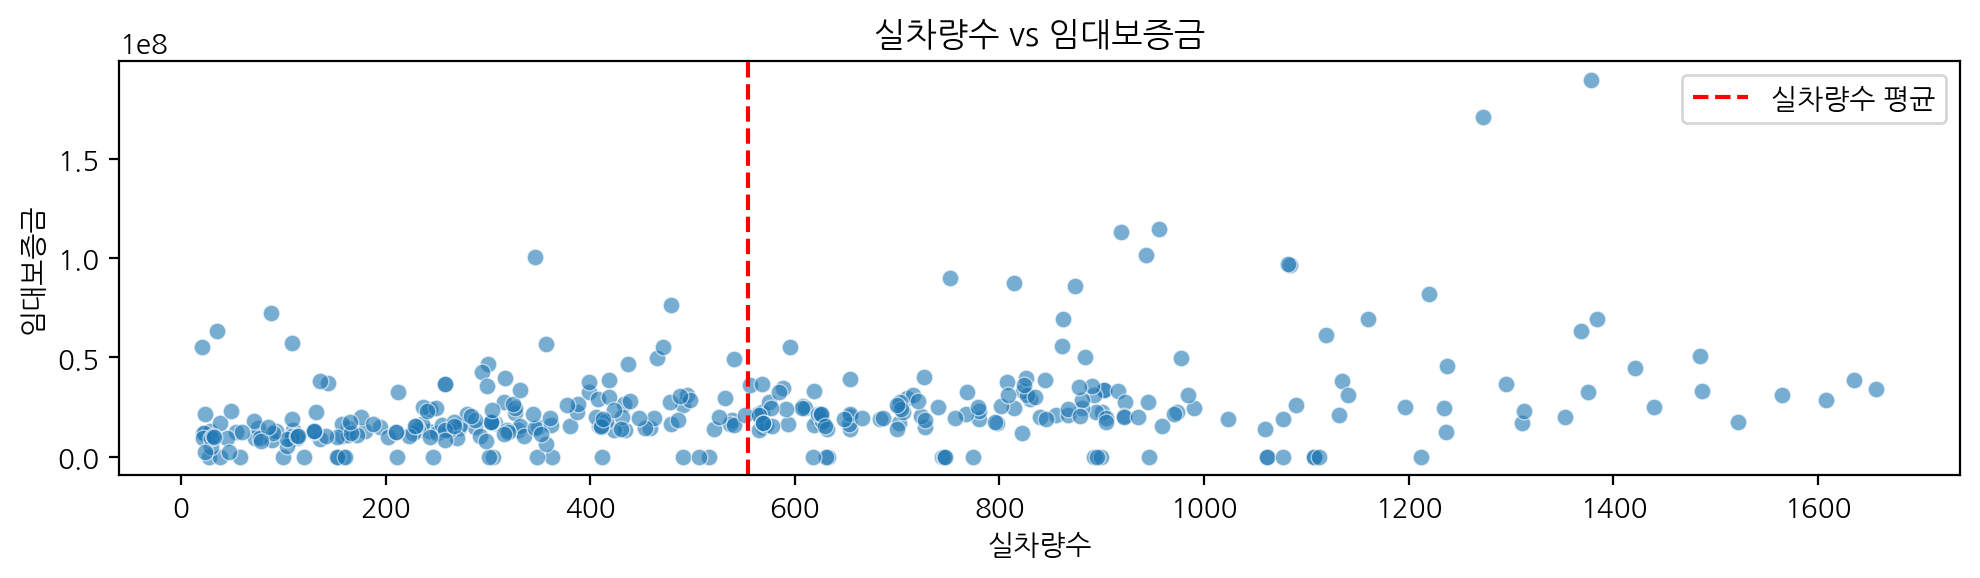

In [594]:
high_corr_vars = '임대보증금'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 5) 60-80

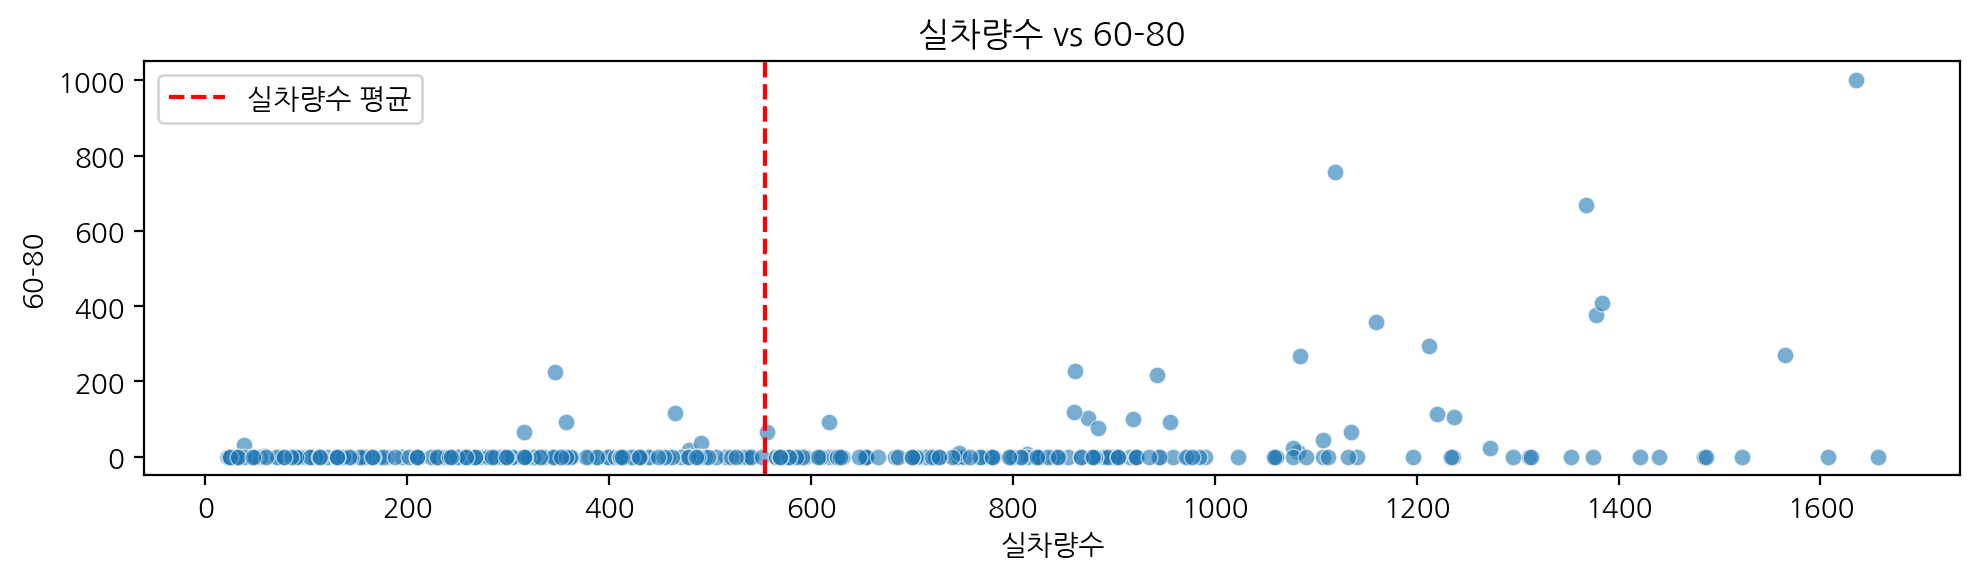

In [597]:
high_corr_vars = '60-80'
correlation_scatter(apart, '실차량수', high_corr_vars)

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [600]:
# 함수 만들기
def categorical_vs_target(data, target_var, categorical_var):
    # 범주형 변수별 평균 실차량수 계산
    mean_values = data.groupby(categorical_var)[target_var].mean().reset_index()

    # 막대그래프 시각화
    sns.barplot(data=mean_values, x=target_var, y=categorical_var, palette='viridis')
    plt.title(f'{categorical_var} 별 평균 {target_var} 시각화')
    plt.xlabel(f'평균 {target_var}')
    plt.ylabel(categorical_var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

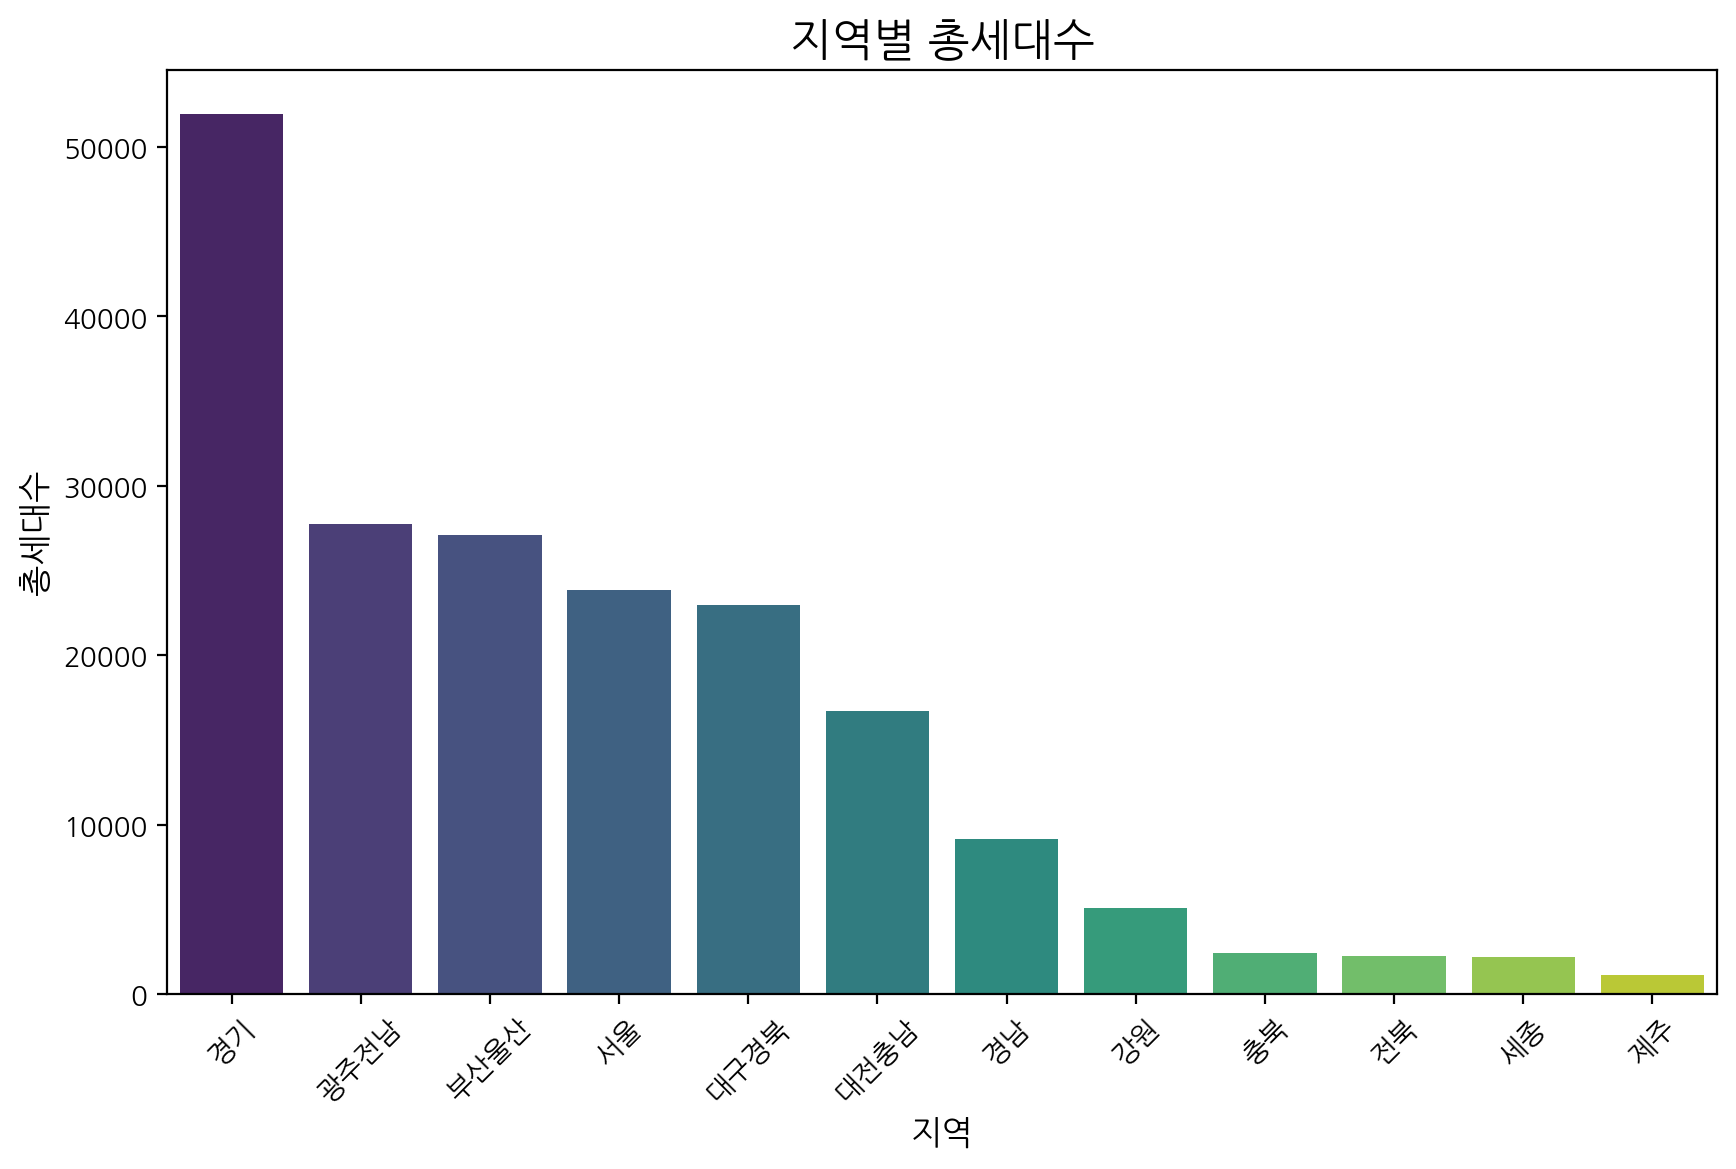

In [601]:
# 지역별 총세대수의 합계를 구한 후 내림차순 정렬
result = apart.groupby('지역')['총세대수'].sum().sort_values(ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
sns.barplot(x=result.index, y=result.values, palette='viridis')

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 총세대수', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('총세대수', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

#### 1) 지역

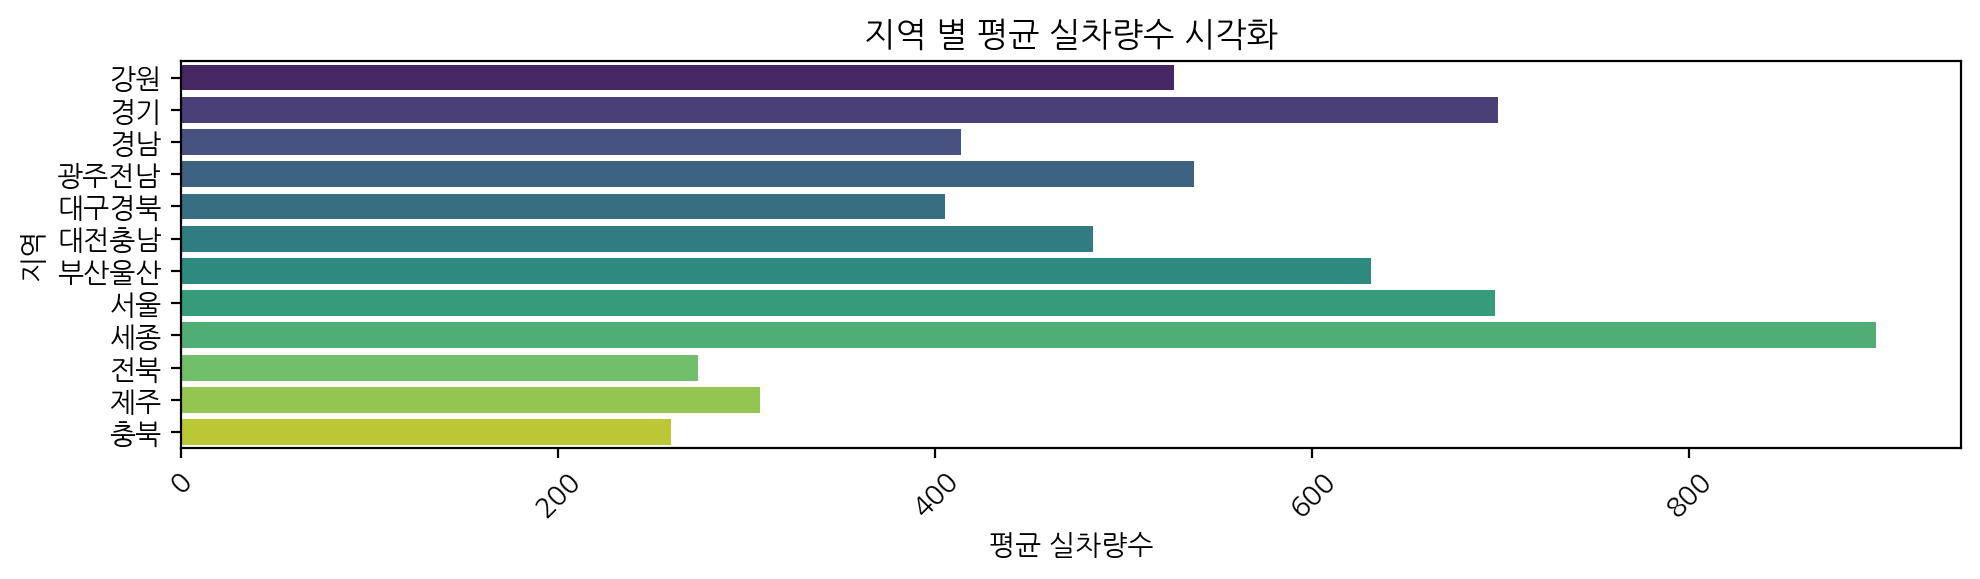

지역
세종      899.000000
경기      698.637500
서울      696.891892
부산울산    631.463415
광주전남    537.462963
강원      526.700000
대전충남    483.692308
경남      413.800000
대구경북    405.089552
제주      307.333333
전북      274.428571
충북      260.000000
Name: 실차량수, dtype: float64


In [605]:
categorical_var = '지역'
categorical_vs_target(apart, '실차량수', categorical_var)

# 지역에 따른 실차량수의 평균을 구하고 내림차순으로 정렬
result = apart.groupby(categorical_var)['실차량수'].mean().sort_values(ascending=False)

print(result)


세종>경기>서울 순

#### 2) 준공연도

준공연도는 연속형 범주아닌가? 단변량 때는 연속형으로 분석했는데..여기서는 왜 범주형이지?

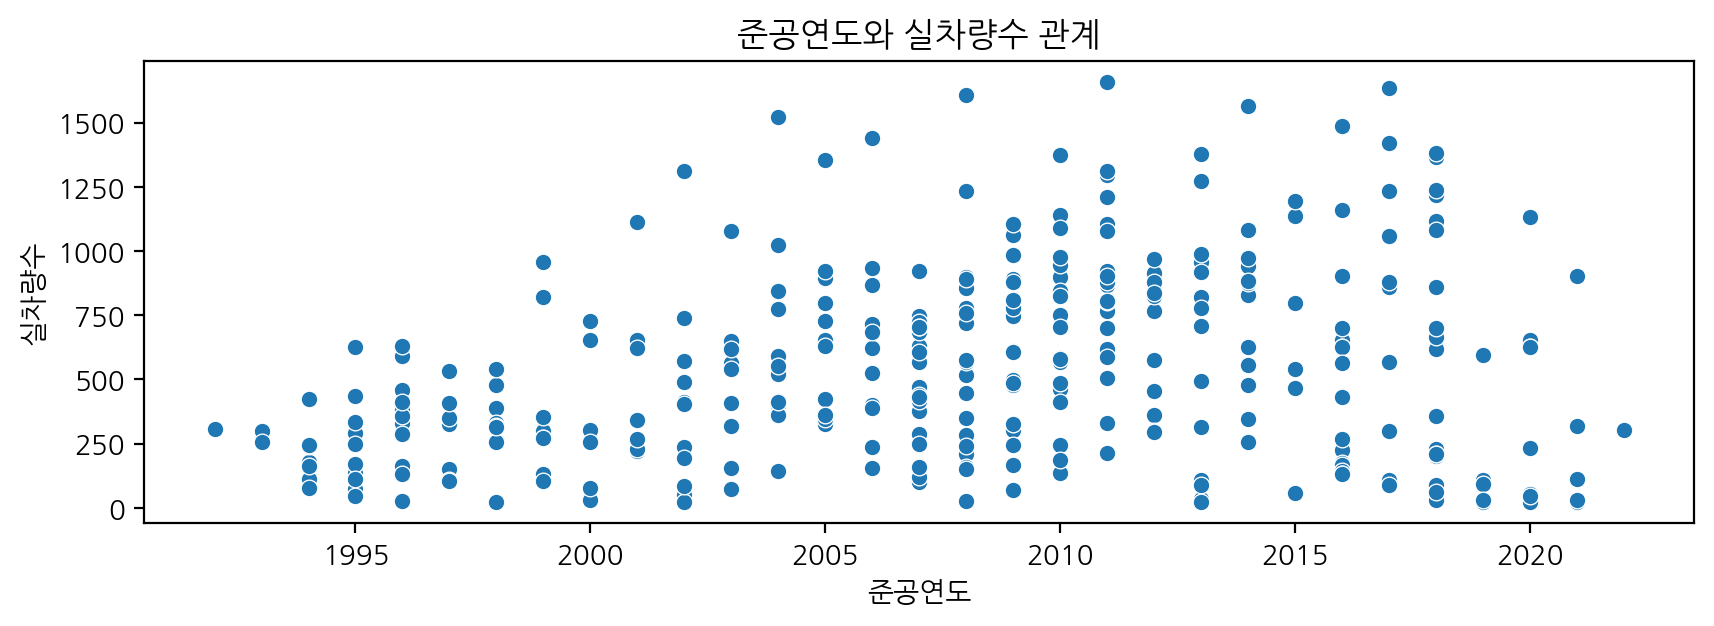

In [610]:
sns.scatterplot(x=apart['준공연도'], y=apart['실차량수'])
plt.title('준공연도와 실차량수 관계')
plt.xlabel('준공연도')
plt.ylabel('실차량수')
plt.show()

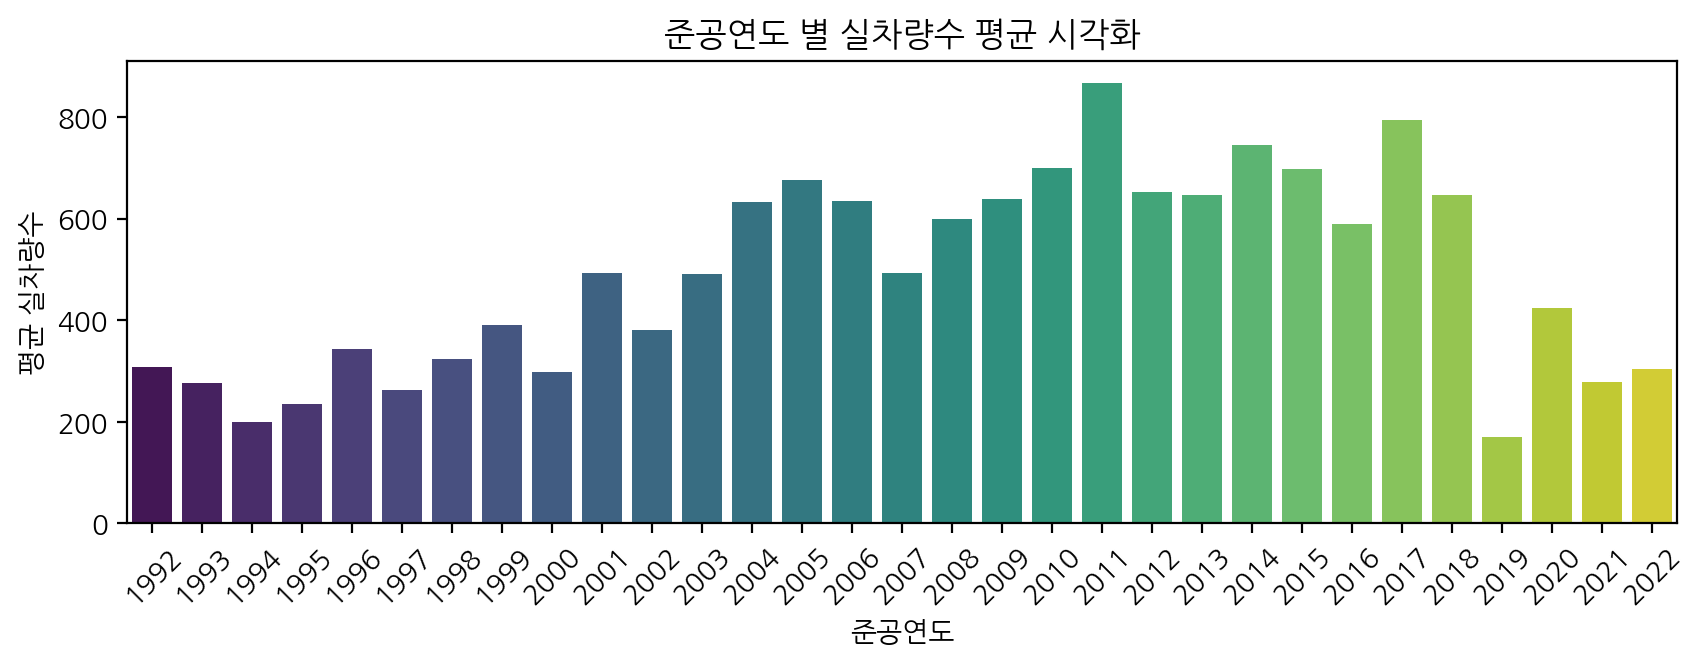

In [612]:
sns.barplot(x='준공연도', y='실차량수', data=apart, ci=None, palette='viridis')
plt.title('준공연도 별 실차량수 평균 시각화')
plt.xlabel('준공연도')
plt.ylabel('평균 실차량수')
plt.xticks(rotation=45)
plt.show()

#### 3) 건물형태

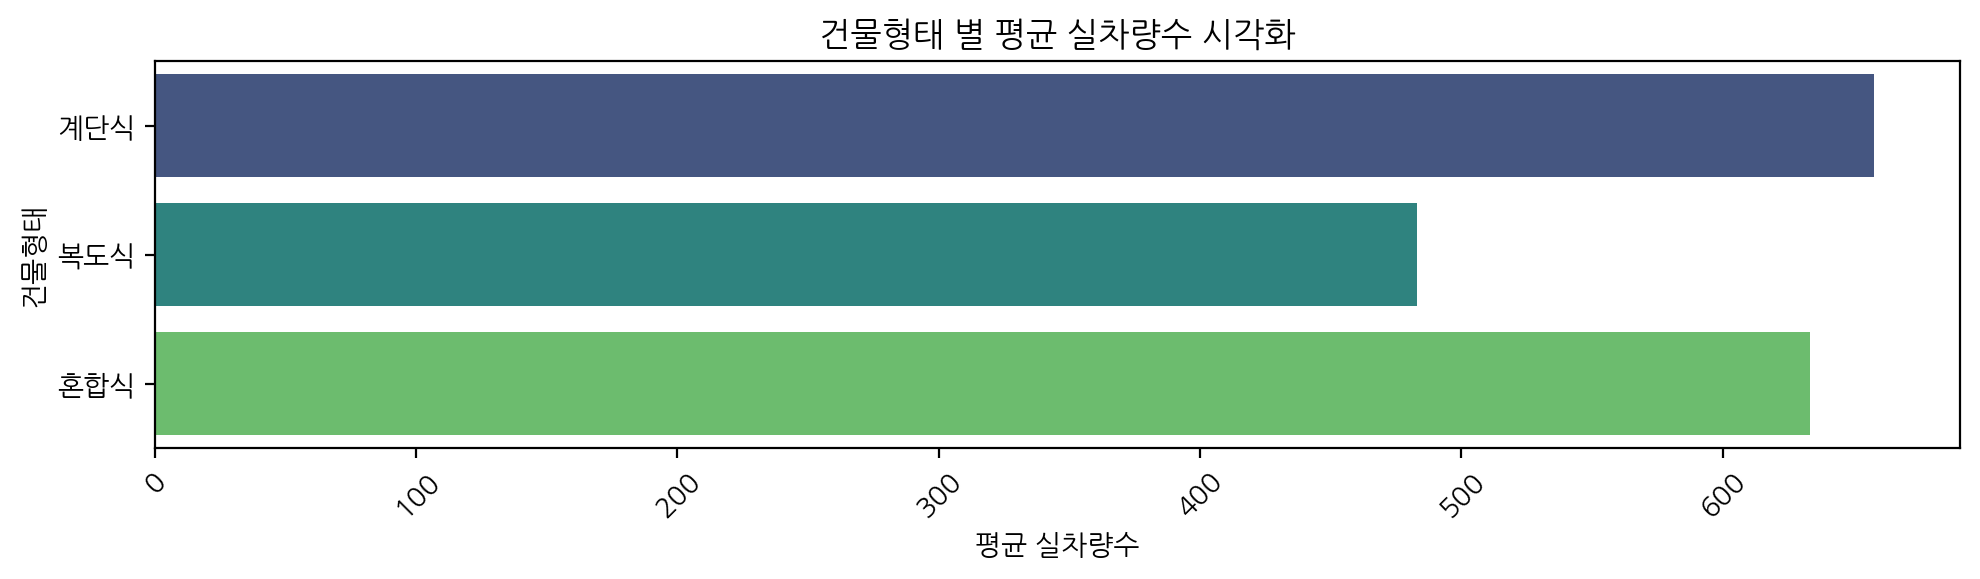

In [614]:
categorical_var = '건물형태'
categorical_vs_target(apart, '실차량수', categorical_var)

#### 4) 난방방식

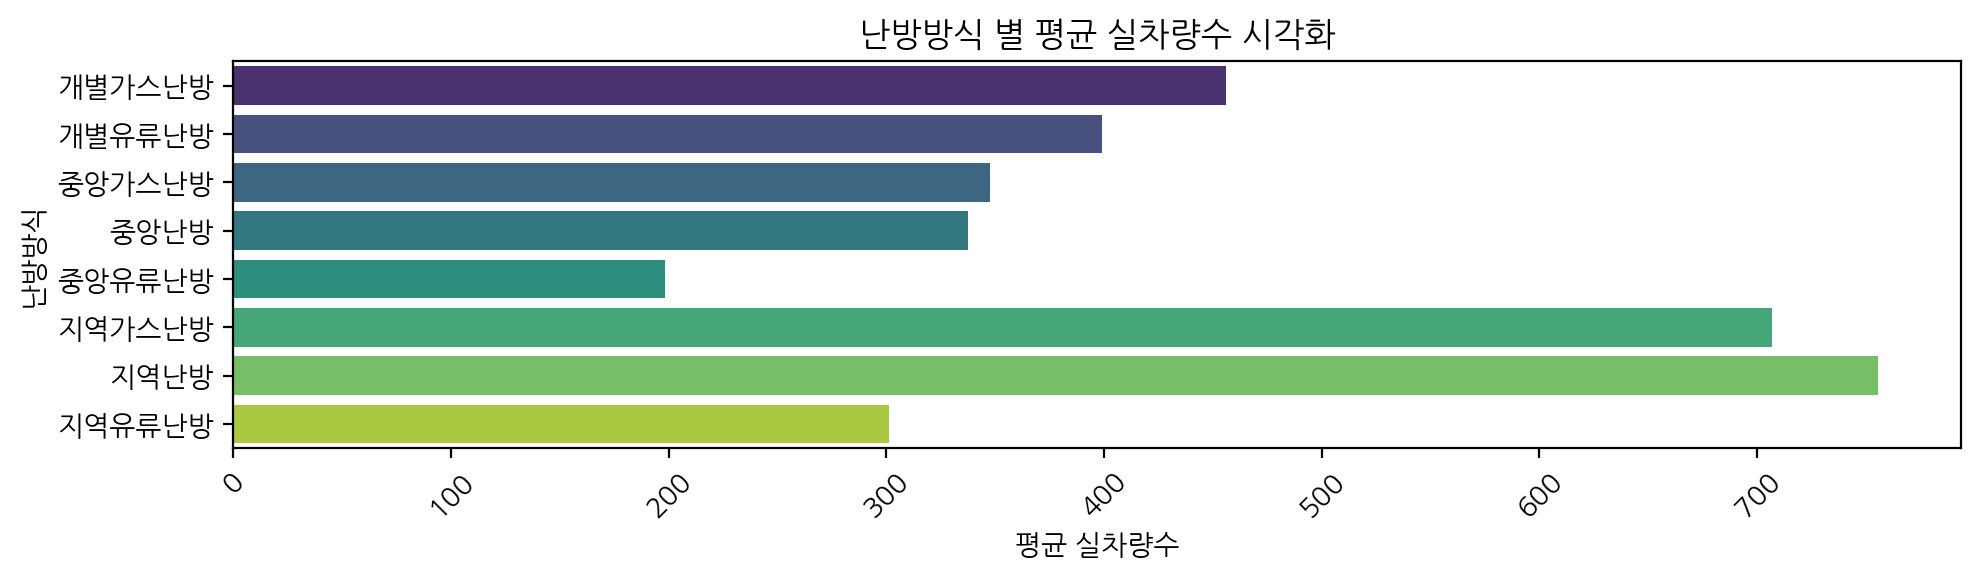

난방방식
지역난방      755.787879
지역가스난방    706.838710
개별가스난방    456.162562
개별유류난방    399.000000
중앙가스난방    347.428571
중앙난방      337.666667
지역유류난방    301.000000
중앙유류난방    198.500000
Name: 실차량수, dtype: float64


In [618]:
categorical_var = '난방방식'
categorical_vs_target(apart, '실차량수', categorical_var)
# 범주형 변수인 난방방식에 따른 실차량수의 평균을 구하고 내림차순으로 정렬
result = apart.groupby(categorical_var)['실차량수'].mean().sort_values(ascending=False)

print(result)


#### 5) 승강기설치여부

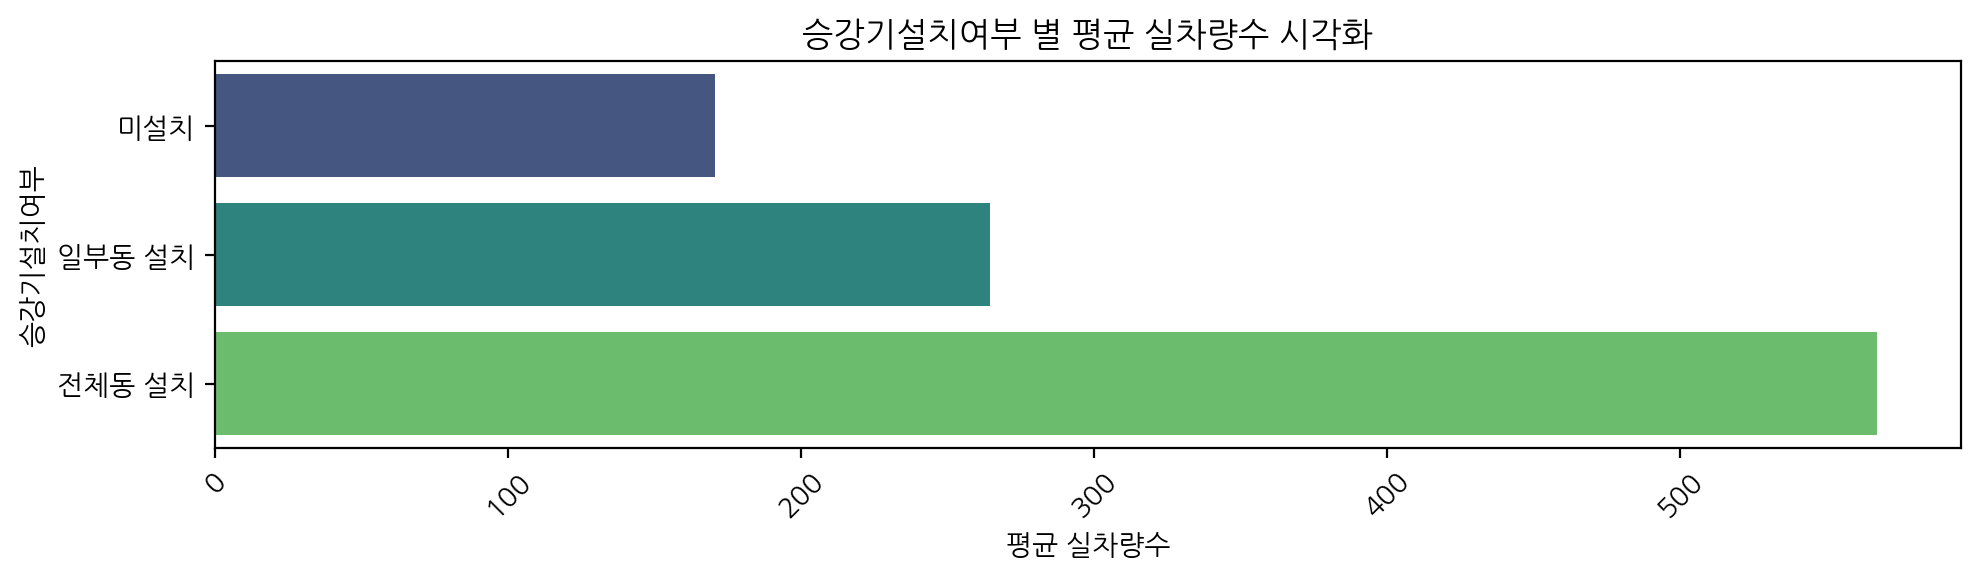

In [622]:
categorical_var = '승강기설치여부'
categorical_vs_target(apart, '실차량수', categorical_var)

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [626]:
# '난방방식' 변수 값 변경
apart['난방방식'] = apart['난방방식'].replace({
    '개별가스난방': '개별',
    '개별유류난방': '개별',
    '지역난방': '지역',
    '지역가스난방': '지역',
    '지역유류난방': '지역',
    '중앙가스난방': '중앙',
    '중앙난방': '중앙',
    '중앙유류난방': '중앙'
})

# 변경된 난방방식 확인
print(apart['난방방식'].value_counts())

난방방식
개별    204
지역    131
중앙     19
Name: count, dtype: int64


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [629]:

# '승강기설치여부' 변수 값 변경
apart['승강기설치여부'] = apart['승강기설치여부'].replace({
    '전체동 설치': 1,
    '일부동 설치': 0,
    '미설치': 0
})

# 변경된 승강기설치여부 확인
print(apart['승강기설치여부'].value_counts())

승강기설치여부
1    342
0     12
Name: count, dtype: int64


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [632]:
# '단지코드'와 '지역' 변수를 제거
apart = apart.drop(columns=['단지코드', '지역'])

- 최종 데이터를 확인합니다.

In [635]:
# 변경된 데이터프레임 확인
apart.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-40,40-60,60-80,80-100,100-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,150,216,111,0,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,5.522750e+07,340148.333333


In [637]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     354 non-null    int64  
 1   준공연도     354 non-null    int32  
 2   건물형태     354 non-null    object 
 3   난방방식     354 non-null    object 
 4   승강기설치여부  354 non-null    int64  
 5   실차량수     354 non-null    int64  
 6   총면적      354 non-null    float64
 7   10-40    354 non-null    int64  
 8   40-60    354 non-null    int64  
 9   60-80    354 non-null    int64  
 10  80-100   354 non-null    int64  
 11  100-200  354 non-null    int64  
 12  임대보증금    354 non-null    float64
 13  임대료      354 non-null    float64
dtypes: float64(3), int32(1), int64(8), object(2)
memory usage: 37.5+ KB


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [640]:
# 파일로 저장
joblib.dump(apart, 'new_data4.pkl')

['new_data4.pkl']